PRML ASSIGNMENT 2 
EE21RESCH01010
ANNU

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from numpy.random import randn,seed,uniform
from branca.colormap import LinearColormap
from numpy.linalg import inv,norm,det,eigvals,pinv
import branca
from scipy.stats import multivariate_normal,norm

In [9]:
#Function declarations
def load_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    #np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t
def function(x):
    func=3.68*x-110.42 #height and weight relationship
    return func
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def modifiedsinusoidal(x):
    return 5+np.sin(2 * np.pi * x)

def pseudoinverse(X,y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

def least_squares(X,y,regularized=False,lamda=0.01):
    #this code given solution of the least square problem 
    #Relation between inputs and least square solution is y=W.T@X where
    #X=[ones(N);x] and size(X) is (D+1)xN
    #Inputs:
    #y of size DxN
    #so W=pinv(X).T@y.T to give size of (D+1)X D
    if regularized:
        m,n=(X.T@X).shape
        W=(np.linalg.inv(X.T@X + lamda*np.eye(m,n))@X.T).T@y.T    
    else:     W=np.linalg.pinv(X).T@y.T
    return W

def regularised(X,y,lam=10):
    m,n=X.shape
    I=np.eye((n))
    return (np.linalg.inv(X.T @ X +lam*I)@X.T @y)[:,0]


def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def costfunction(X,y,theta):
    '''Cost function for linear regression'''
    #Initialization of useful values 
    m = np.size(y)
    
    #Vectorized implementation
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def costFunctionReg(X,y,theta,lamda = 10):
    '''Cost function for ridge regression (regularized L2)'''
    #Initialization
    m = len(y) 
    J = 0
    
    #Vectorized implementation
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    return(J) 

def polynomial_design_matrix(x, powers, bias=True):
    """
    Create an N x (M + 1) desig matrix (if bias == True)
    with Gaussian basis functions
    
    Parameters
    ----------
    mus: numpy.ndarray(M, 1)
        Centres of the gaussian basis functions
    x: numpy.ndarray(N, 1)
        A 1-dimensional input vector
    s: float
        The scale term
    bias: bool
        Whether to include a bias term
    
    Returns
    -------
    Phi: numpy.ndarray(N, (M + bias))
    """
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def with_bias(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))



According to www.geogebra.org, the relationship between human height (in inches) and weight (in pounds) is given by t = 3.86x − 110.42

(a) Generate 25 meaningful data points from this relationship, mimicking a noisy sensor, where the noise follows a zero mean Gaussian with a variance of 20. Plot the scatter plot of the data

b) Now, we need to estimate the above relationship from the noisy data generated in (a) by fitting a line, i.e., ˆt = y(x, w) = w0 + w1x. Let us use least squares criterion discussed in the class to estimate the parameters w0 and w1. Generate and plot the error surface J(w0, w1) associated with this approach. Locate the minimum on this error surface

Estimated parameters are [[-108.44951487]
 [   3.66531557]]


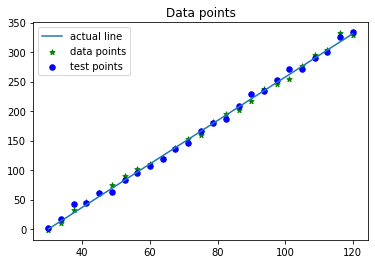

<Figure size 432x288 with 0 Axes>

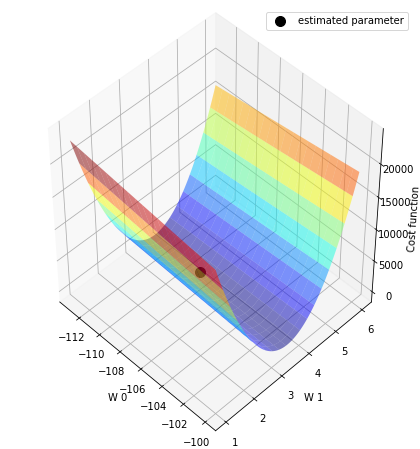

In [10]:
#QUESTION 1

X_train,Y_train=load_data(function,25,np.sqrt(20), domain=[30, 120]) #our train data points
X_test,Y_test=load_data(function,25,np.sqrt(20), domain=[30, 120]) #our test data points
plt.scatter(X_train,Y_train,label="data points",color="green",marker="*",s=30)
plt.plot(X_train,3.68*X_train-110.42*np.ones((25,)),label="actual line")
plt.scatter(X_test,Y_test,label="test points",color="blue",marker="o",s=30)

plt.title("Data points")
plt.legend()

def pseudoinverse(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


X = np.c_[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],X_train] # defining features
x_test = np.c_[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],X_test] # defining features
Y = np.c_[Y_train] # defining labels
W = pseudoinverse(X,Y) # normal equation
pred=x_test.dot(W) #Predicted value
print("Estimated parameters are",W)
Y_true = function(X_train)
Y_true = np.c_[Y_true] 
e_n=(pred-Y_true)**2
cost_function=costfunction(X,Y,W)

plt.figure()
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-113,-100,100),np.linspace(1,6,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, Y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.scatter(W[0],W[1],label="estimated parameter",color="black",marker="o",s=100)

ax.set_xlabel('W 0')
ax.set_ylabel('W 1')
ax.set_zlabel('Cost function')
ax.view_init(45, -45)
plt.legend()
plt.show()
#We can see that there is very minimal difference between estimated parameters for height and weight relation
#our convex error surface is minimum at estimated parameters

Understanding Model Order and Over-fitting:
(a) Generate 20 data points from tn = sin(2πxn) + en, where xn ∈ [01] and en/ N(0, 0.1), and divide them into two sets, a training set and a testing test each containing 10 points
(b) Fit an Mth degree polynomial to the training data using least squares approach, i.e.,

ˆtn = w0 + w1x + · · · + w_mx^m + · · · + w_Mx^M

Use the estimated parameter vector w, to predict the target values in training and testing datasets. Plot the root mean squared error associated with each dataset, for M = 0, 1, . . . , 9. Explain your results
(c) Increase the size of the training dataset o 100 points, and repeat (b

(d) Add a l2 regularization term to the objective function in (b) and repeat (b) and (c). Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets
(e) Modify the function in (a) to tn = 5 + sin(2πxn) + en to study the effect of regularizing the bias coefficient w0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support 

[[-3.12345634e+02]
 [ 3.12545955e+02]
 [ 1.29234279e+02]
 [-3.06402752e+03]
 [ 2.78956503e+04]
 [-1.30207279e+05]
 [ 3.49418460e+05]
 [-5.61884605e+05]
 [ 5.35027526e+05]
 [-2.78104894e+05]
 [ 6.07899232e+04]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


The most effective model order for 10 datapoints with polykernel which error is minimum is  0
Minimum error is 1.7910512313351312


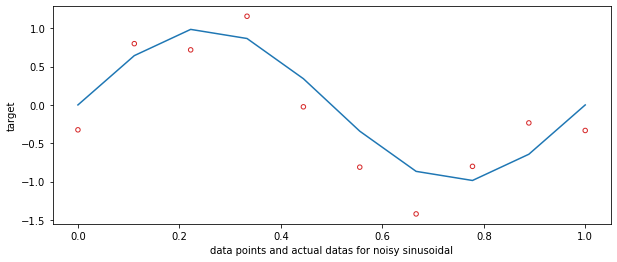

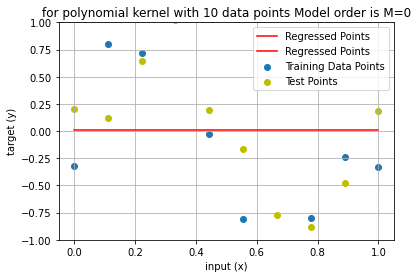

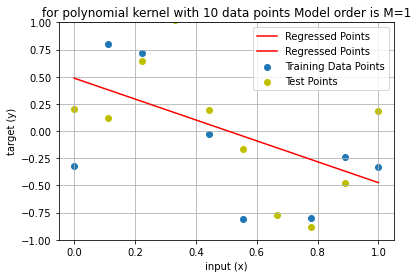

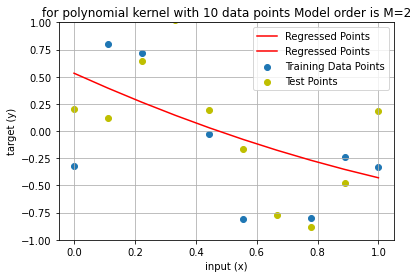

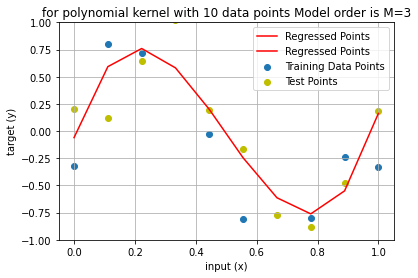

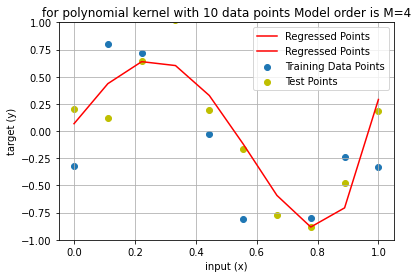

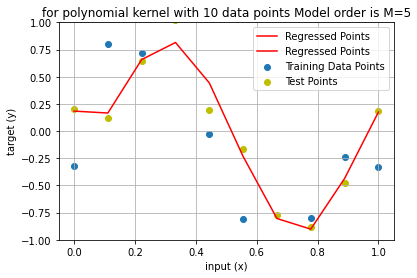

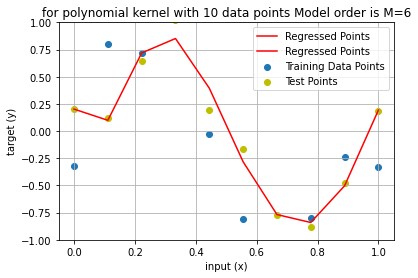

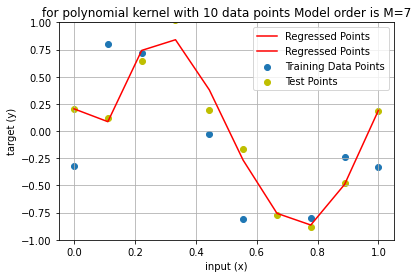

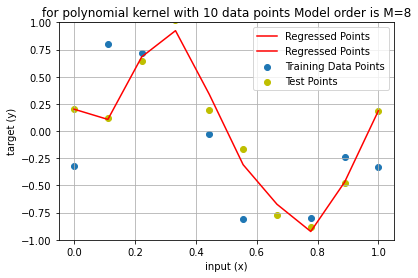

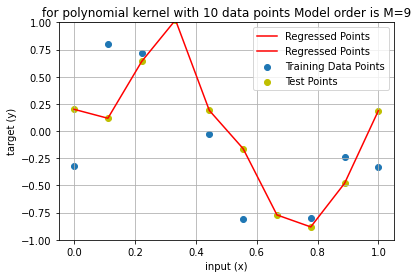

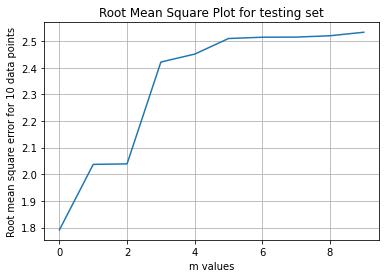

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support 

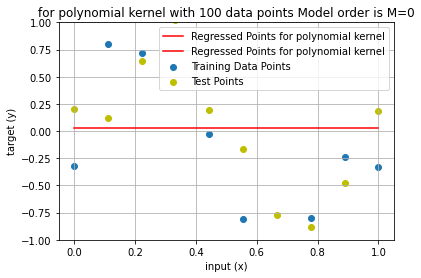

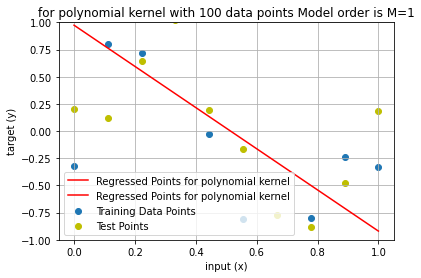

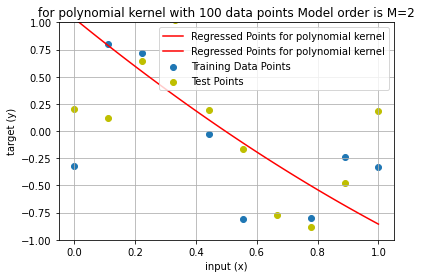

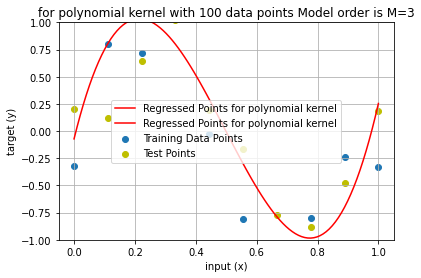

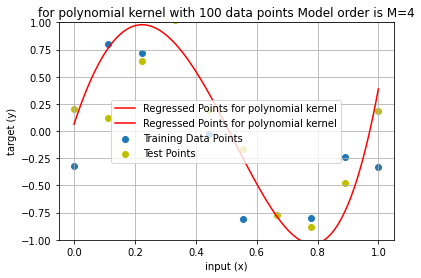

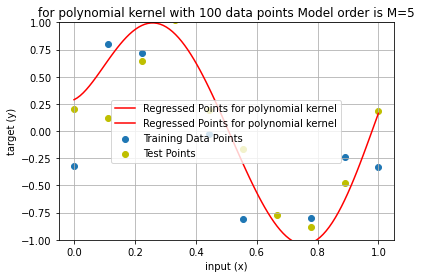

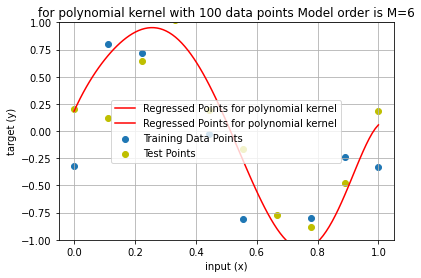

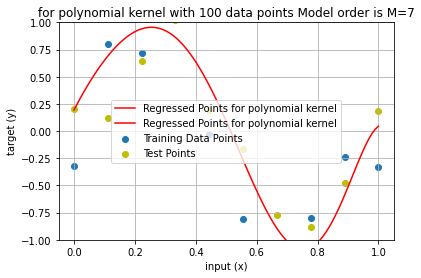

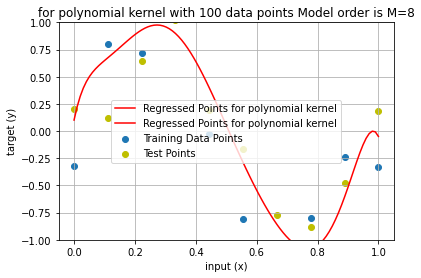

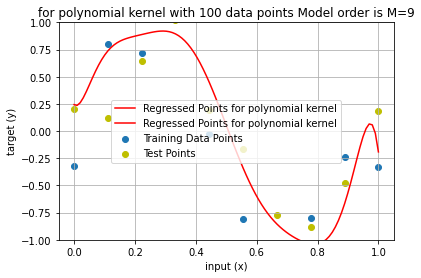

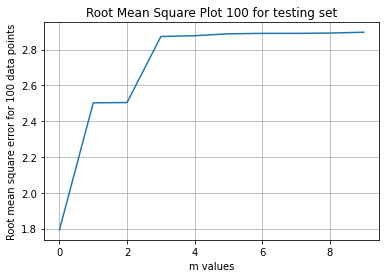

The most effective model order for 100 datapoints with polykernel which error is minimum is  0
Minimum error is 1.7922253730294704


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support 

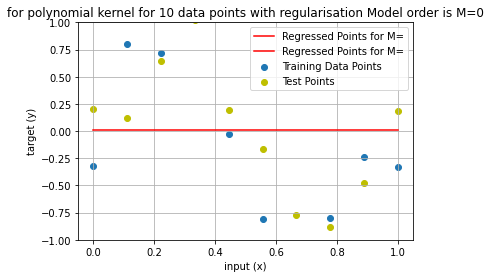

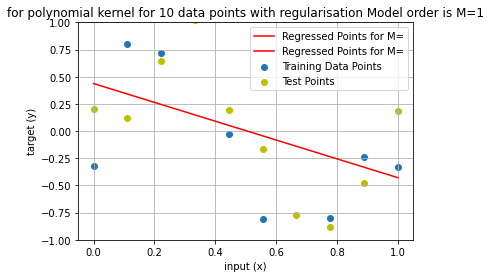

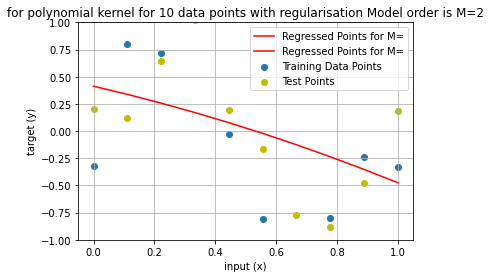

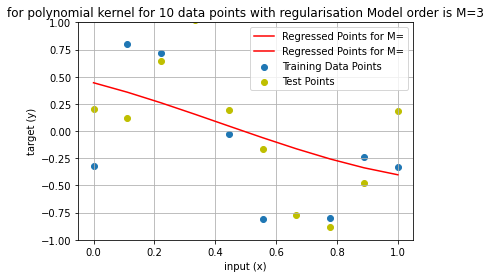

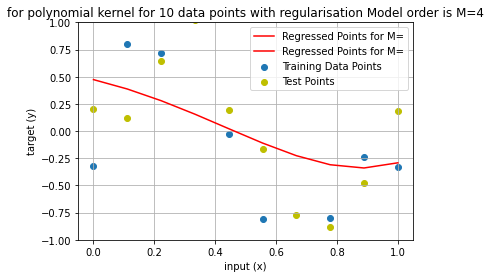

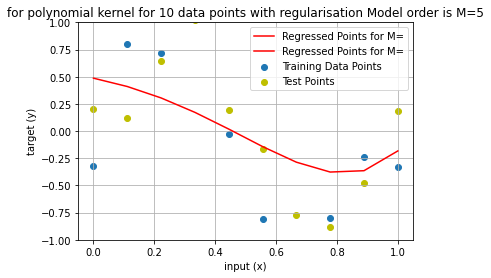

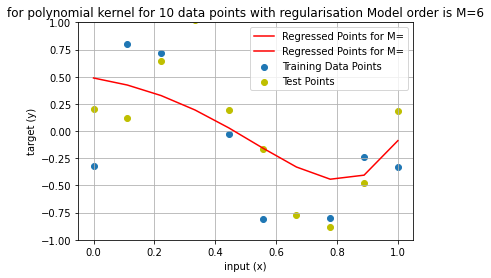

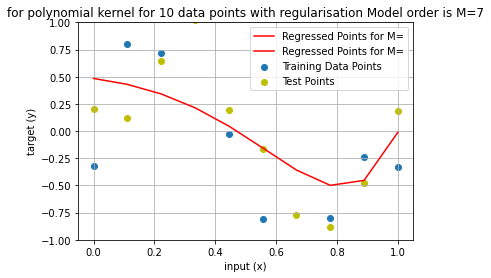

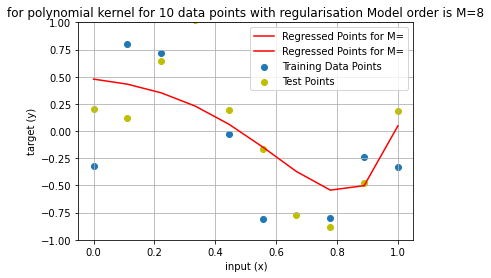

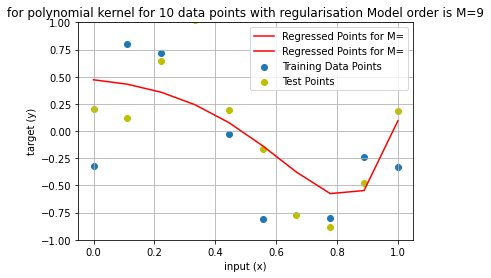

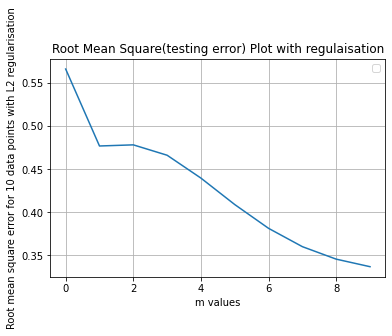

No handles with labels found to put in legend.


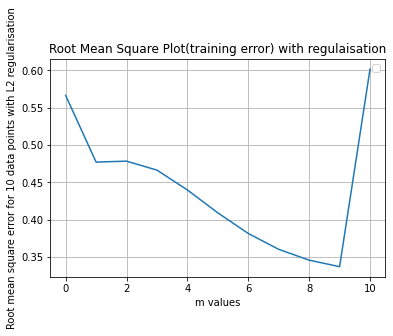

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


The most effective model order for 10 datapoints with regularisation polykernel which error is minimum is  9
Minimum error is 0.3368591057241138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support 

The most effective model order for 10 datapoints with polykernel which error is minimum is  0
Minimum error is 0.5667509387630157
[[ 1.60069073e+02]
 [-1.55164988e+02]
 [-7.18620191e+01]
 [ 1.78382053e+03]
 [-1.55034333e+04]
 [ 6.96580340e+04]
 [-1.81892413e+05]
 [ 2.85761591e+05]
 [-2.65933400e+05]
 [ 1.34995608e+05]
 [-2.87975001e+04]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Text(0, 0.5, 'rms')

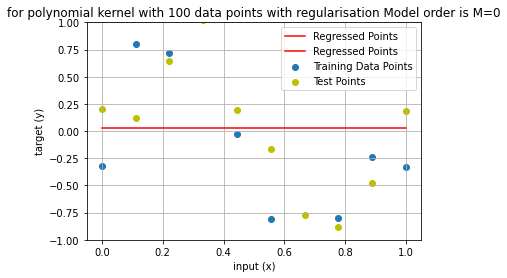

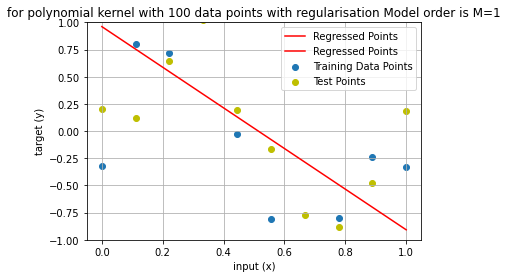

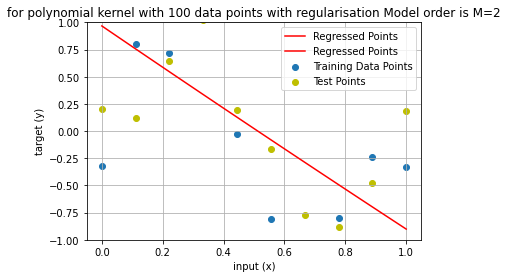

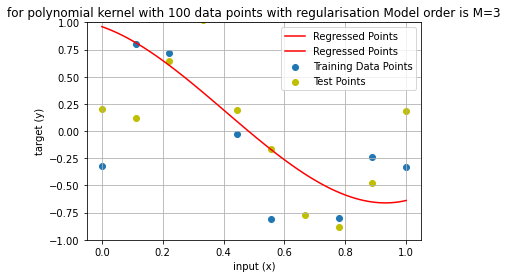

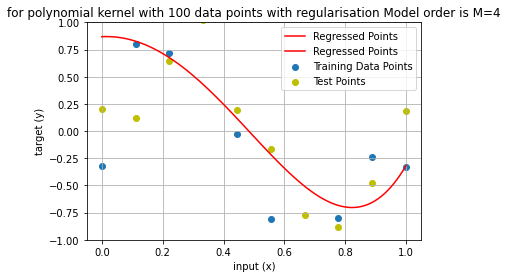

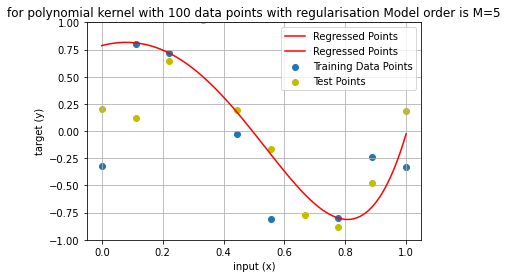

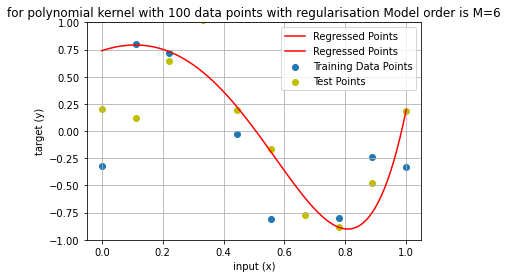

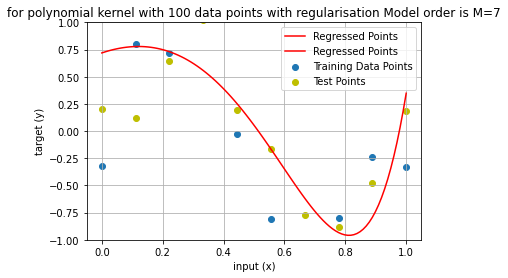

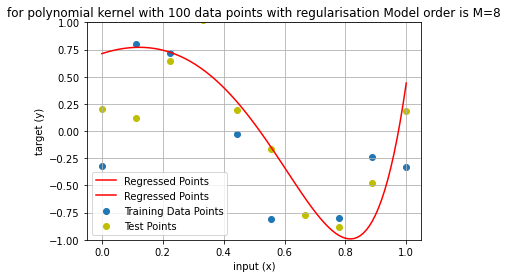

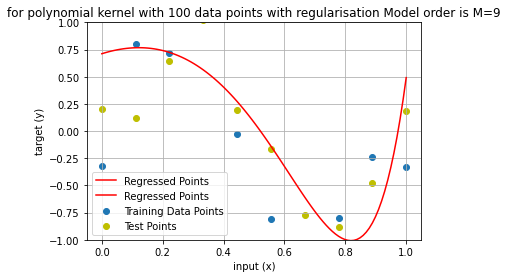

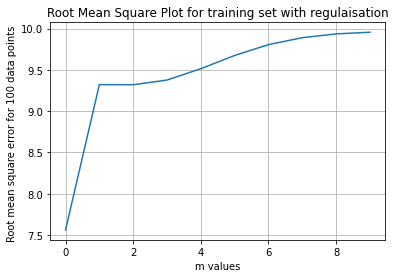

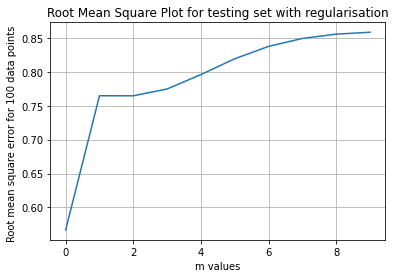

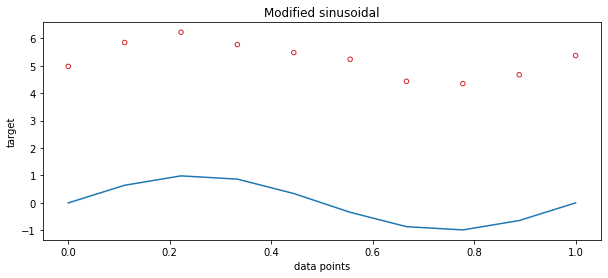

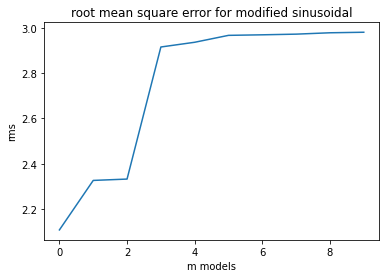

In [11]:
# Question second


#Generating 20 data points from noisy sunoisoidal and dividing them into 2 sets each of 10 data points
x_train, y_train = load_data(sinusoidal, 10, np.sqrt(0.1))
y_true=sinusoidal(x_train)
x_test, y_test= load_data(sinusoidal, 10, np.sqrt(0.1))


nsteps = 10
x = np.linspace(0, 1, 10)
t_true = np.sin(2 * np.pi * x)



fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x, t_true)
ax.scatter(x_train, y_train, edgecolors="tab:red", c="None", s=20)
plt.xlabel("data points and actual datas for noisy sinusoidal")
plt.ylabel('target')


#Model oders from 0 to 9
powers=[i for i in range(10)]
X = polynomial_design_matrix(x_train, powers, bias=True)
Y = np.c_[y_test] # defining labels
W = closed_form_solution(X,Y) # normal equation
predicted=X.dot(W)
print(W)
#Effect of model orders for 10 training set
rms=[]
rms_tr=[]
xpoints = np.linspace(0, 1, 10)
M=[i for i in range(10)] #10 model orders
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(x_train, powers, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  e_n=((predicted-y_test)**2)
  e_n_tr=((predicted-y_train)**2)
  rms=np.append(rms,np.sqrt(np.sum(e_n)/10).flatten())
  rms_tr=np.append(rms,np.sqrt(np.sum(e_n_tr)/10).flatten())
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.plot(xpoints,predicted,10,c='r',label='Regressed Points ')
  plt.title(f'for polynomial kernel with 10 data points Model order is M={i}')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.legend()
  #plt.title("Regressed Curve for polynomial kernel with 10 data points")
  plt.ylim(-1,1)
  plt.grid(True)
model_order=np.argmin(rms)  
min_error=rms[model_order]
print("The most effective model order for 10 datapoints with polykernel which error is minimum is ",model_order)
print("Minimum error is",min_error)
#rms=rms.reshape((10,-1))
plt.figure()
plt.plot(rms)
plt.xlabel("m values")
plt.ylabel("Root mean square error for 10 data points")
plt.title("Root Mean Square Plot for testing set")
plt.grid(True)
plt.show()

#2(C) question 2 part c
#When size of training set increases to 100
x_train1, y_train1 = load_data(sinusoidal, 100, np.sqrt(0.1))
x_test1, y_test1 = load_data(sinusoidal, 100, np.sqrt(0.1))
xpoints1 = np.linspace(0, 1, 100)
rms1=[]
rms1_tr=[]
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(x_train1, powers, bias=True)
  Y = np.c_[y_test1] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  e_n=((predicted-y_test)**2)
  e_n_tr=((predicted-y_train1)**2)
  rms1=np.append(rms1,np.sqrt(np.sum(e_n)/100).flatten())
  rms1_tr=np.append(rms1,np.sqrt(np.sum(e_n_tr)/100).flatten())
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.plot(xpoints1,predicted,10,c='r',label='Regressed Points for polynomial kernel')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.legend()
  plt.title(f'for polynomial kernel with 100 data points Model order is M={i}')
  plt.ylim(-1,1)
  plt.grid(True)
plt.figure()
plt.plot(rms1)
plt.xlabel("m values")
plt.ylabel("Root mean square error for 100 data points")
plt.title("Root Mean Square Plot 100 for testing set")
plt.grid(True)
plt.show()


model_order=np.argmin(rms1)  
min_error=rms1[model_order]
print("The most effective model order for 100 datapoints with polykernel which error is minimum is ",model_order)
print("Minimum error is",min_error)
#Regularisation
regularised_costfunction=costFunctionReg(X,Y,W,lamda = 0.01)


#We can see that with increased data points to 100,we need more increased model orders also ,as value of M  lies between dimensionality and data points number
#Increasing the data points implies us to increase the model order too for best fit
#2nd question part d -REGULARIZED LEAST SQUARES
rms=[]
xpoints = np.linspace(0, 1, 10)
M=[i for i in range(10)]
powers=[]
rms_tr=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(x_train, powers, bias=True)
  Y = np.c_[y_test] # defining labels
  W = regularised(X,Y,lam=0.1) # normal equation
  predicted=X.dot(W)
  e_n=((predicted-y_test)**2)
  e_ntr=((predicted-y_train)**2)
  rms=np.append(rms,np.sqrt(np.sum(e_n)/10).flatten())
  rms_tr=np.append(rms,np.sqrt(np.sum(e_ntr)/10).flatten())
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.plot(xpoints,predicted,10,c='r',label='Regressed Points for M=')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.legend()
  plt.title(f'for polynomial kernel for 10 data points with regularisation Model order is M={i}')
  plt.ylim(-1,1)
  plt.grid(True)
plt.figure()
plt.plot(rms)
plt.xlabel("m values")
plt.ylabel("Root mean square error for 10 data points with L2 regularisation")
plt.title("Root Mean Square(testing error) Plot with regulaisation")
plt.grid(True)
plt.legend()
plt.show()
plt.figure()
plt.plot(rms_tr)
plt.xlabel("m values")
plt.ylabel("Root mean square error for 10 data points with L2 regularisation")
plt.title("Root Mean Square Plot(training error) with regulaisation")
plt.grid(True)
plt.legend()
plt.show()
model_order=np.argmin(rms)  
min_error=rms[model_order]
print("The most effective model order for 10 datapoints with regularisation polykernel which error is minimum is ",model_order)
print("Minimum error is",min_error)
#When size of training set increases to 100 with regulaisation
x_train1, y_train1 = load_data(sinusoidal, 100, np.sqrt(0.1))
xpoints1 = np.linspace(0, 1, 100)
rmstest=[]
rmstrain=[]
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(x_train1, powers, bias=True)
  Y = np.c_[y_test1] # defining labels
  W =  regularised(X,Y,lam=0.1) # normal equation
  predicted=X.dot(W)
  predicted=predicted.reshape(10,-1)
  e_n=((predicted-y_test)**2)
  predicted=predicted.reshape(100,-1)
  e_ntrain=((predicted-y_train1)**2)
  rmstest=np.append(rmstest,np.sqrt(np.sum(e_n)/100).flatten())
  rmstrain=np.append(rmstrain,np.sqrt(np.sum(e_ntrain)/100).flatten())
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  predicted=predicted.reshape(100,-1)
  plt.plot(xpoints1,predicted,10,c='r',label='Regressed Points ')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.legend()
  plt.title(f'for polynomial kernel with 100 data points with regularisation Model order is M={i}')
  plt.ylim(-1,1)
  plt.grid(True)
plt.figure()
M=[0,1,2,3,4,5,6,7,8,9] #Model orders
plt.plot(rmstrain)
plt.xlabel("m values")
plt.ylabel("Root mean square error for 100 data points ")
plt.title("Root Mean Square Plot for training set with regulaisation")
plt.grid(True)

plt.figure()
plt.plot(rmstest)
plt.xlabel("m values")
plt.ylabel("Root mean square error for 100 data points ")
plt.title("Root Mean Square Plot for testing set with regularisation")
plt.grid(True)
model_order=np.argmin(rmstest)  
min_error=rmstest[model_order]
print("The most effective model order for 10 datapoints with polykernel which error is minimum is ",model_order)
print("Minimum error is",min_error)

## Question second part e with modified sinusoidal
x_train, y_train = load_data(modifiedsinusoidal, 10, np.sqrt(0.1))
y_true=modifiedsinusoidal(x_train)
x_test, y_test=load_data(modifiedsinusoidal, 10, np.sqrt(0.1))


nsteps = 10
x = np.linspace(0, 1, 10)
t_true = np.sin(2 * np.pi * x)



fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x, t_true)
ax.scatter(x_train, y_train, edgecolors="tab:red", c="None", s=20)
plt.xlabel("data points")
plt.ylabel('target')
plt.title("Modified sinusoidal")




#REPEATING ABOVE WITH MODIFIED SINUSOIDAL

powers=[i for i in range(10)]
X = polynomial_design_matrix(x_train, powers, bias=True)
Y = np.c_[y_test] # defining labels
W = closed_form_solution(X,Y) # normal equation
predicted=X.dot(W)
print(W)
#Effect of model orders for 10 training set
rms=[]
xpoints = np.linspace(0, 1, 10)
M=[i for i in range(10)]
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(x_train, powers, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  e_n=((predicted-y_test)**2)
  rms=np.append(rms,np.sqrt(np.sum(e_n)/10).flatten())
  

plt.figure()
plt.plot(rms)
plt.title("root mean square error for modified sinusoidal")
plt.xlabel("m models")
plt.ylabel("rms")

#Effect of regularisation on training and testing error
#Regularization will almost always hurt your training error - that’s expected. Without regularization in place, 
#the training algorithm will typically try to minimize the training error independent of any other consideration. 
#Adding regularization penalties imposes constraints on your model that will tend to cause training error to increase somewhat (depending on the amount of regularization).

#Typically this is done as part of a tradeoff (in order to reduce generalization error - the error observed in the out-of-sample test set).
# Regularization can reduce model over-fitting (which is evidenced by in-sample training errors that are much lower than out-of-sample test errors). Using regularization typically requires some calibration to find the “sweet spot” that minimizes the out-of-sample test error.

#If both training and test error degrade, that’s usually a sign of over-regularization (model is penalized so severely that it under-fits the data, meaning that it cannot explain much of the data variability via the predictors).

#In your case, it’s likely that you need to reduce the penalization coefficients being used. Some packages will automatically tune penalty coefficients based on a 1-D search of the penalty value, selecting the value that minimizes the test error.








#Conclusion:Best fit
  #Each model with specific kernel is EEROR (RMS ERROR ) IS PLOTTED ,so M is choosen such that test error is minimum,which implies the concept of best fit.











































Understanding Choice of Kernel:
(a) Generate 100 data points from tn = sin(2πxn) + en, where xn ∈ [0 1] and en/ N(0, 0.1), and divide them into two sets, a training set and a testing test each containing 10 points. Fit an Mth degree polynomial using polynomial, Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b) Repeat (a) by modifying the target function to

tn = sinusoid + en x ∈ [0, 1)

   triangle + en x ∈ [1, 2)
 
   Gaussian pulse + en ∈ [2, 3]
Clearly discuss your observations/results for each of the three kernel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support 

model order with min error with poly kernel is: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

min error with sigmoid kernel is: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:187: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:187: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:187: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

min error with gaussian kernel is: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:268: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:285: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


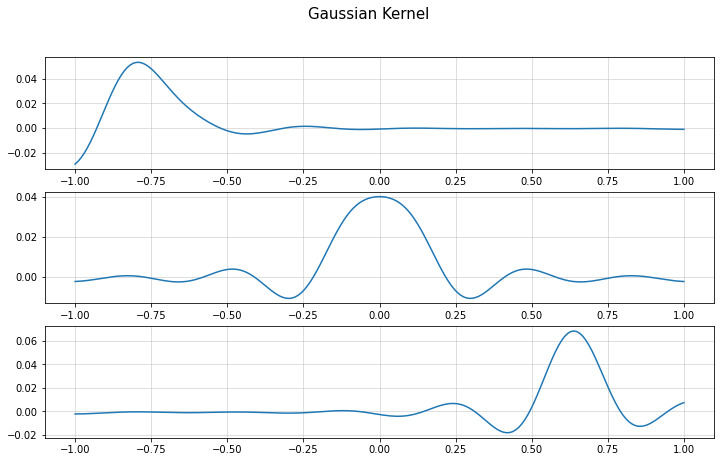

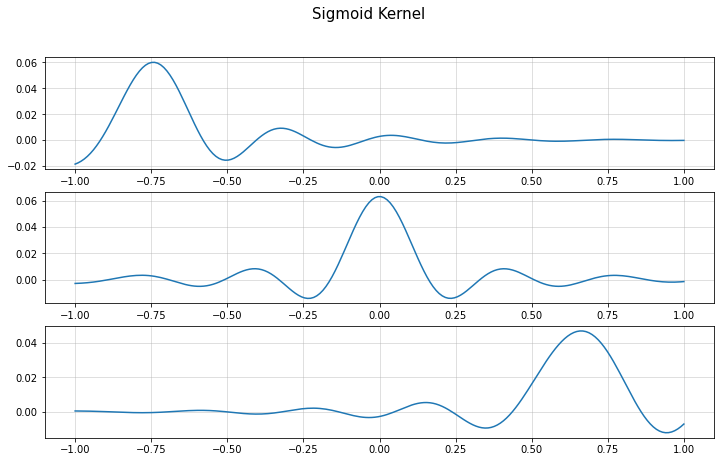

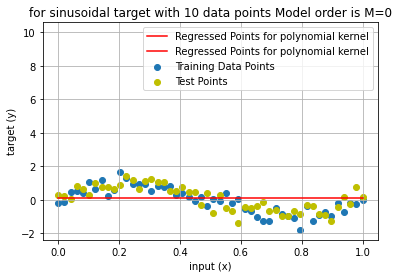

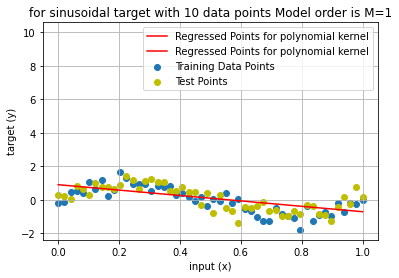

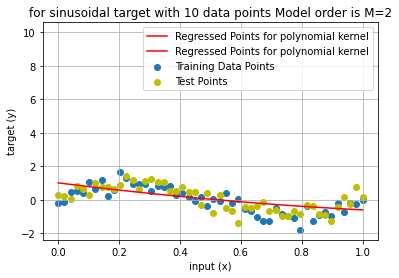

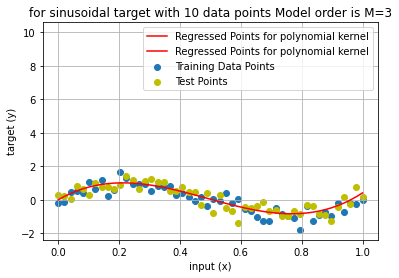

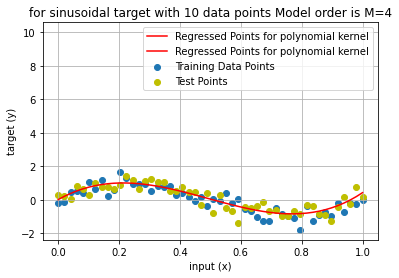

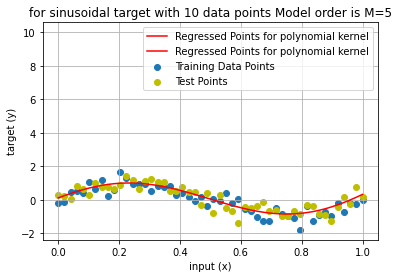

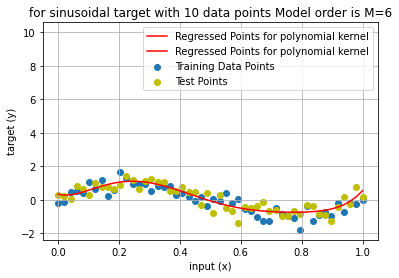

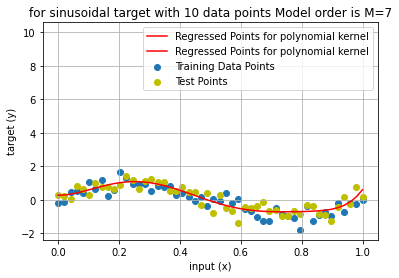

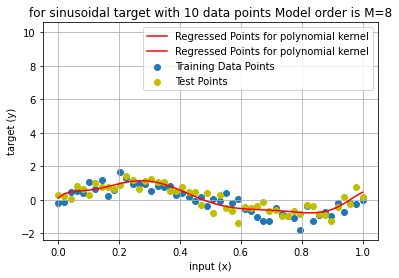

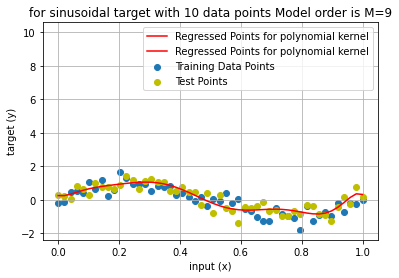

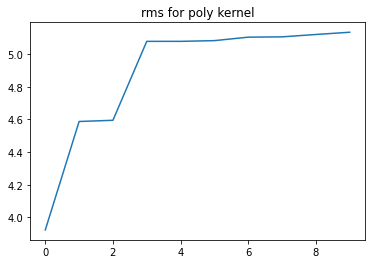

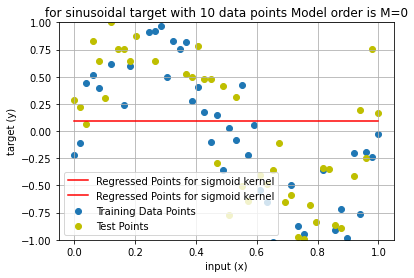

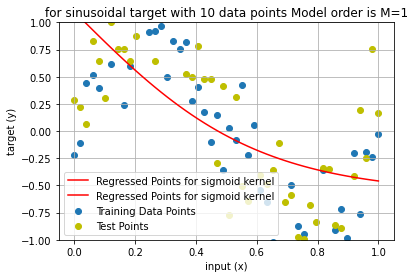

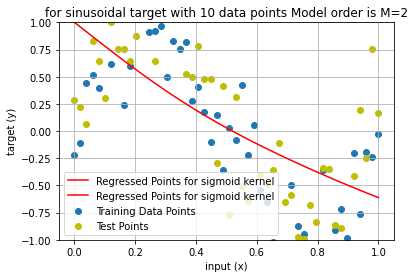

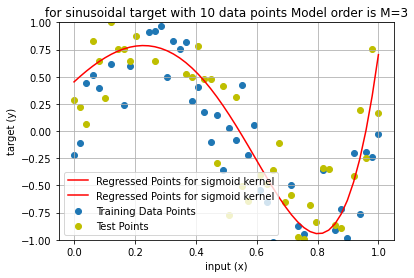

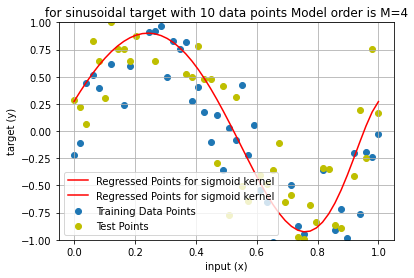

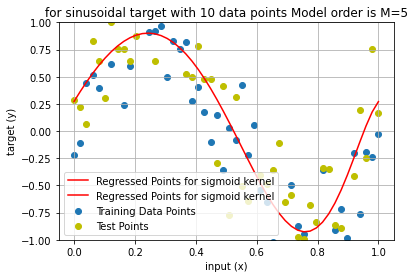

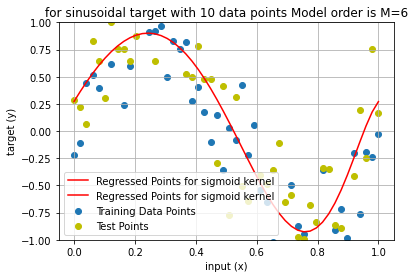

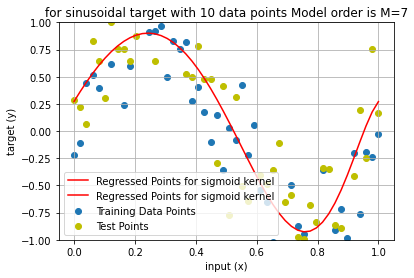

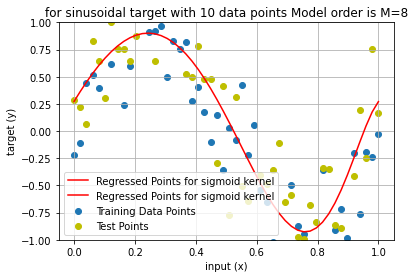

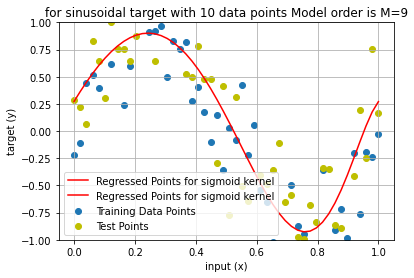

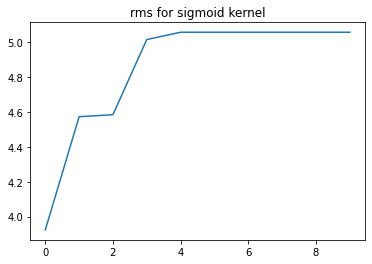

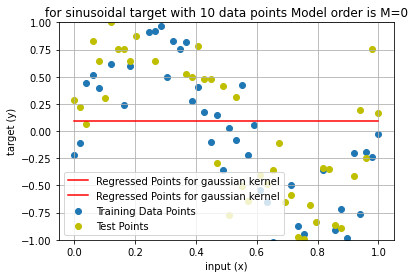

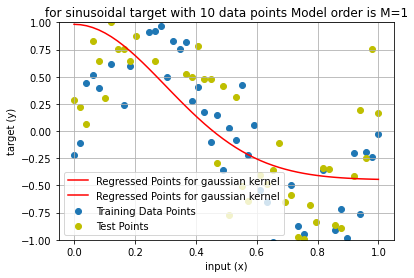

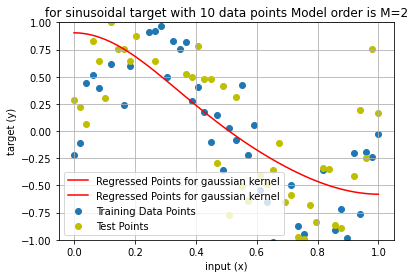

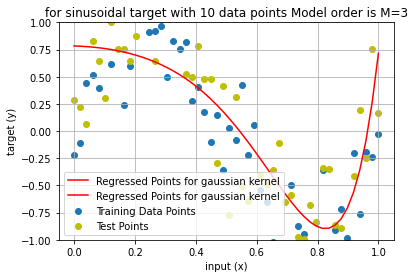

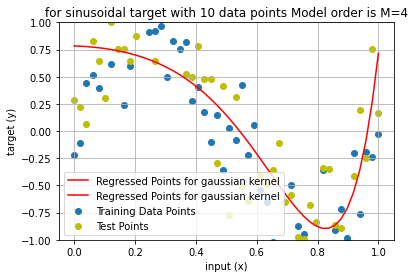

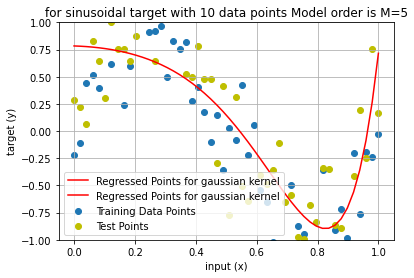

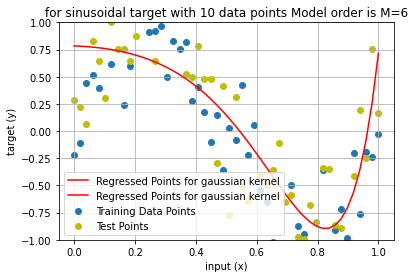

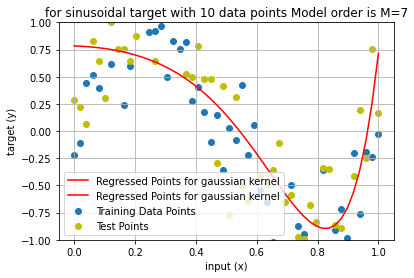

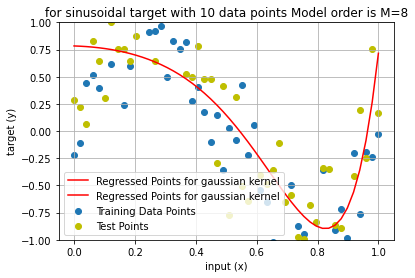

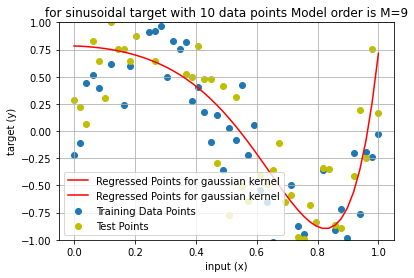

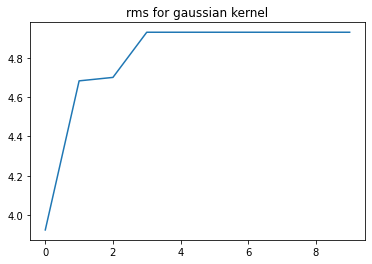

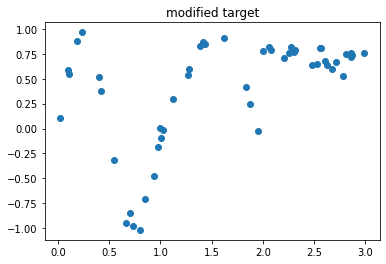

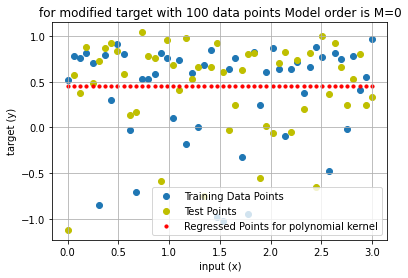

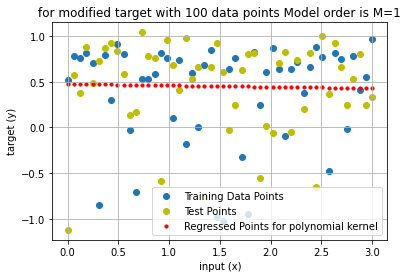

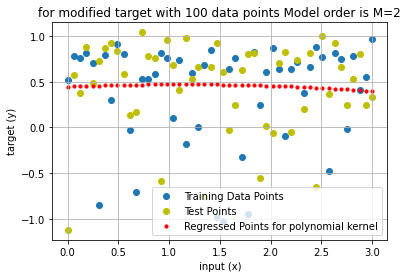

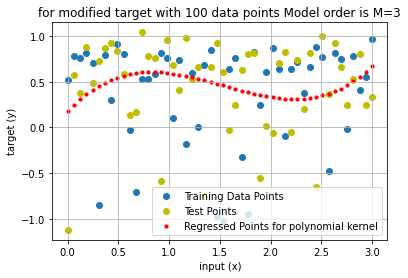

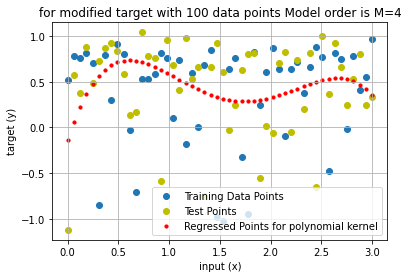

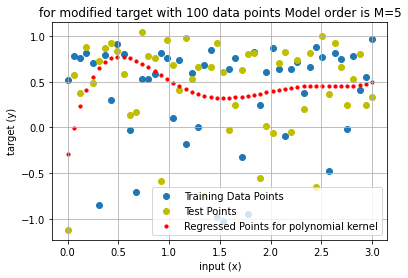

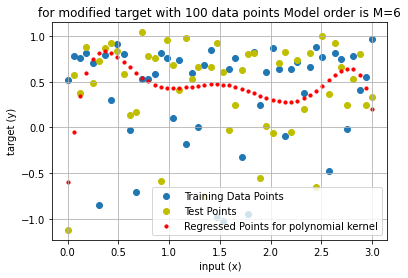

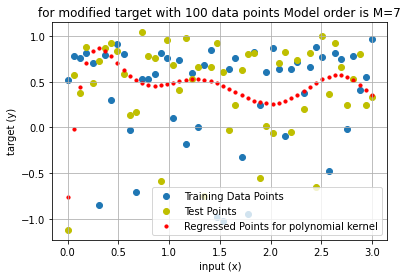

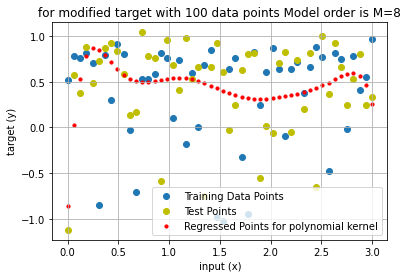

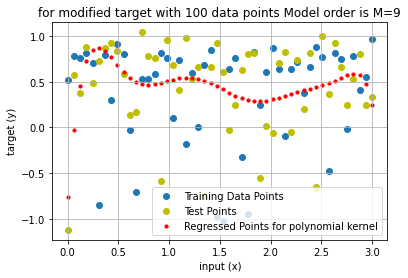

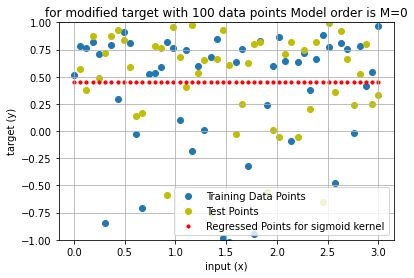

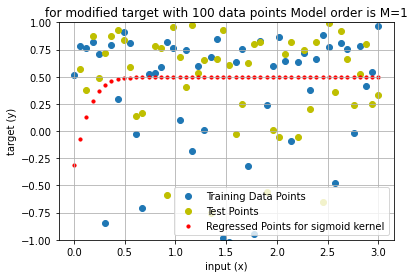

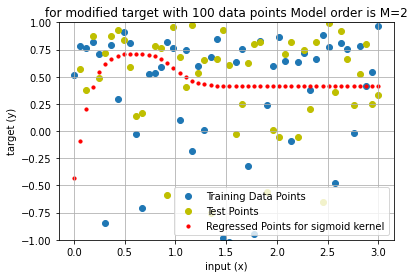

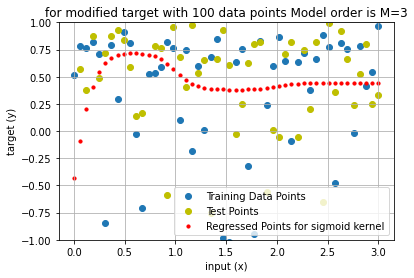

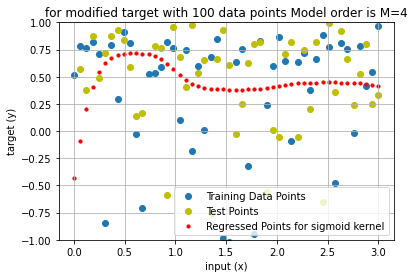

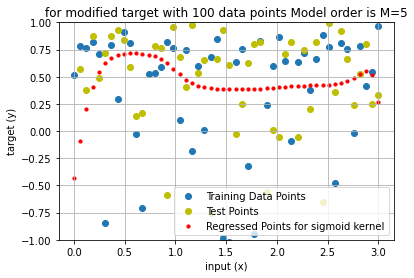

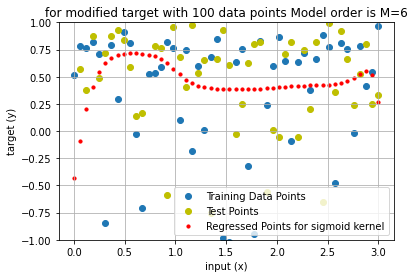

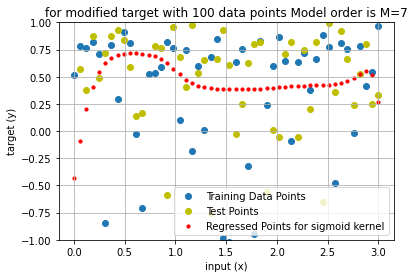

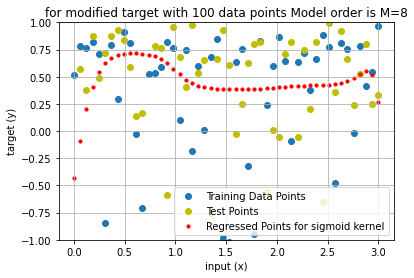

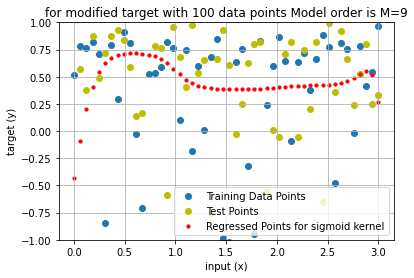

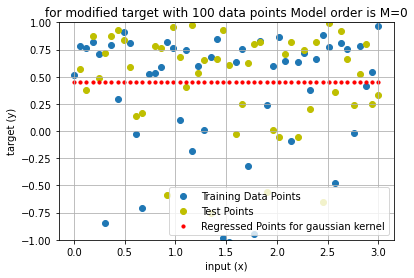

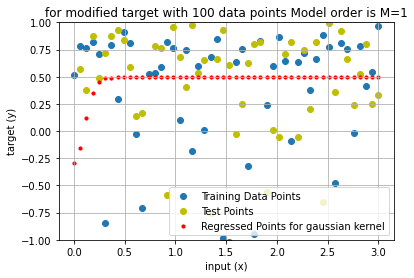

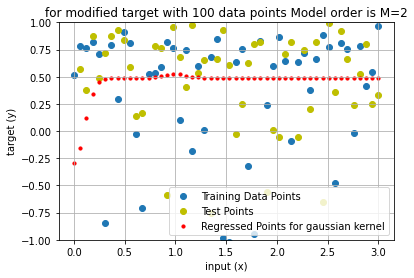

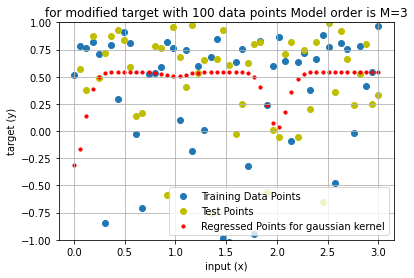

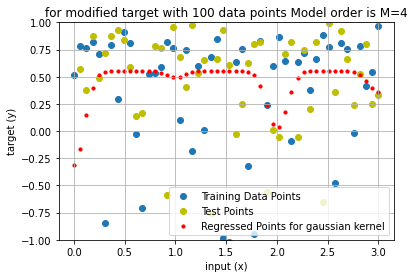

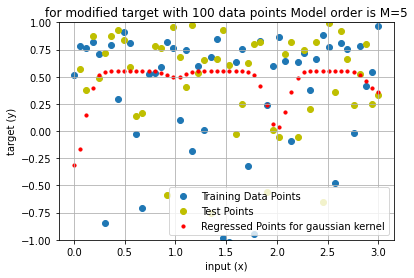

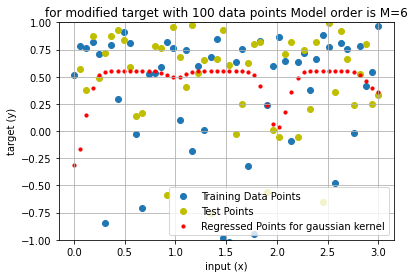

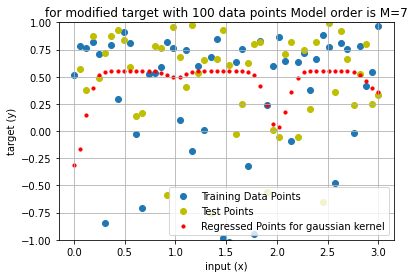

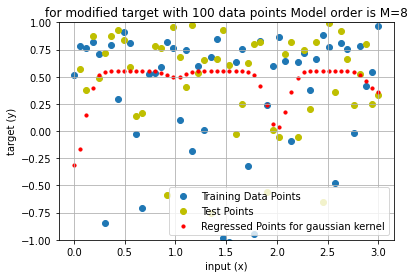

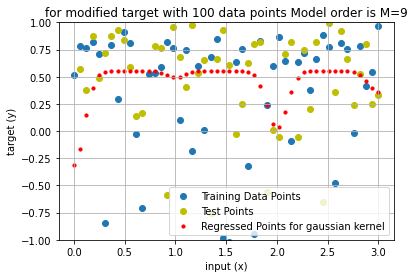

In [12]:
#Qouestion 3
def sigmoid(z): 
  return 1 / (1 + np.exp(-z))

def gaussian_kernel(x, mu, s):
  return np.exp(-(x - mu)**2 / (2*s**2))
  
def gaussian_standard(x):
  return np.exp(-(x)**2 / (2 *1**2))
def sigmoid_kernel(x, mu, s): 
  return sigmoid((x - mu) / s)
def sigmoid_standard(x): 
  return sigmoid(x)
def gaussian_design_matrix(x, mus, s, bias=True):
    """
    Create an N x (M + 1) desig matrix (if bias == True)
    with Gaussian basis functions
    
    Parameters
    ----------
    mus: numpy.ndarray(M, 1)
        Centres of the gaussian basis functions
    x: numpy.ndarra(N, 1)
        A 1-dimensional input vector
    s: float
        The scale term
    bias: bool
        Whether to include a bias term
    
    Returns
    -------
    Phi: numpy.ndarray(N, (M + bias))
    """
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi


def sigmoid_design_matrix(x, mus, s, bias=True):
    """
    Create an N x (M + 1) desig matrix (if bias == True)
    with sigmoid basis functions
    
    Parameters
    ----------
    mus: numpy.ndarray(M, 1)
        Centres of the sigmoid basis functions
    x: numpy.ndarra(N, 1)
        A 1-dimensional input vector
    s: float
        The scale term
    bias: bool
        Whether to include a bias term
    
    Returns
    -------
    Phi: numpy.ndarray(N, (M + bias))
    """
    Phi = sigmoid_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def polynomial_design_matrix(x, powers, bias=True):
    """
    Create an N x (M + 1) desig matrix (if bias == True)
    with Gaussian basis functions
    
    Parameters
    ----------
    mus: numpy.ndarray(M, 1)
        Centres of the gaussian basis functions
    x: numpy.ndarray(N, 1)
        A 1-dimensional input vector
    s: float
        The scale term
    bias: bool
        Whether to include a bias term
    
    Returns
    -------
    Phi: numpy.ndarray(N, (M + bias))
    """
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
#PLOTTING OF KERNEL
x = np.linspace(-1, 1, 200)
s = 0.1
alpha, beta = 1/2, 1
mus = np.linspace(-1, 1, 12)

xv = [-0.75, 0, 0.65]
def plot_eq_kernel(x, xv, kernel, mus, s):
    fig, ax = plt.subplots(len(xv), 1, figsize=(12, 7))
    for axi, xi in zip(ax, xv):
        xi = np.array([xi])[:, np.newaxis]
        phi = kernel(xi, mus[np.newaxis, :], s)
        phi_prime = kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
        SN = inv(alpha + beta * phi_prime.T @ phi_prime)
        axi.plot(x, beta * phi_prime @ SN.T @ phi.T)
        axi.grid(alpha=0.5)

plot_eq_kernel(x, xv, gaussian_kernel, mus, s)
plt.suptitle("Gaussian Kernel", size=15);

plot_eq_kernel(x, xv, sigmoid_kernel, mus, s)
plt.suptitle("Sigmoid Kernel", size=15);
#Creating 100 data points ,50 for training and 50 for testing 

x_train, y_train = load_data(sinusoidal,50,np.sqrt(0.1)) #creating data set ,50 for training,50 for testing
y_true=sinusoidal(x_train)
x_test, y_test=load_data(sinusoidal,50, np.sqrt(0.1))

# WITH POLYNOMIAL KERNEL
xpoints1 = np.linspace(0, 1, 50) #with poynomial kernel
powers=[]
rms=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(x_train, powers, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  e_n=((predicted-y_train)**2)
  rms=np.append(rms,np.sqrt(np.sum(e_n)/100).flatten())
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.plot(xpoints1,predicted,10,c='r',label='Regressed Points for polynomial kernel')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  
  plt.title(f'for sinusoidal target with 10 data points Model order is M={i}')
  plt.legend()
  plt.grid(True)
modelorder=np.argmin(rms)
plt.figure()
plt.plot(rms)
plt.title("rms for poly kernel")
print("model order with min error with poly kernel is:",modelorder)


rms=[]
#With sigmoid kernel
for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(x_train, mus, s=0.3, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  e_n=((predicted-y_train)**2)
  rms=np.append(rms,np.sqrt(np.sum(e_n)/100).flatten())
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.plot(xpoints1,predicted,10,c='r',label='Regressed Points for sigmoid kernel')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.title(f'for sinusoidal target with 10 data points Model order is M={i}')
  plt.legend()
  plt.ylim(-1,1)
  plt.grid(True)

modelorder=np.argmin(rms)
plt.figure()
plt.plot(rms)
plt.title("rms for sigmoid kernel")
print("min error with sigmoid kernel is:",modelorder)
rms=[]
#WITH GAUSSIAN KERNEL
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(x_train, mus, s=0.3, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  e_n=((predicted-y_train)**2)
  rms=np.append(rms,np.sqrt(np.sum(e_n)/100).flatten())
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.plot(xpoints1,predicted,10,c='r',label='Regressed Points for gaussian kernel')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.title(f'for sinusoidal target with 10 data points Model order is M={i}')
  plt.legend()
  plt.ylim(-1,1)
  plt.grid(True)

modelorder=np.argmin(rms)
plt.figure()
plt.plot(rms)
plt.title("rms for gaussian kernel")
print("min error with gaussian kernel is:",modelorder)
#FOR 3 (b)
##Effect of chnanging the targets type i.e sinusoidal from 0 to 1 ,traingular from 1 to 2 and gaussian from 2 to 3
def gaussian_noise(mean,variance,size=1):
    return np.random.normal(mean,variance,size)
def modified_target(N,mean=0,sigma=1):
    t=np.array([])
    x=np.random.uniform(0,3,(1,N))
    if x.any()<0 or x.any()>3:
        print("input not in range between 0 and 3")
        exit()
    for i in x[0,:]:
        #sinusoid
        if 0<=i and i<1:
            t=np.append(t,np.sin(2*np.pi*i)+gaussian_noise(0,0.1))
        #triangle
        if 1<=i and i<2:
            if 1<=i and i<1.5:
                t=np.append(t,2*i-2+gaussian_noise(0,0.1))
            else:
                t=np.append(t,-2*i+4+gaussian_noise(0,0.1))
        #gaussian
        if 2<=i and i<=3:
            t=np.append(t,np.exp(-(i-mean)**2/2*sigma**2)+gaussian_noise(0,0.1))
    t=np.reshape(t,x.shape)
    return x,t


#Creating 100 data points ,50 for training and 50 for testing for modified target

x, y_train = modified_target(50,mean=0,sigma=np.sqrt(0.1)) #creating data set ,50 for training,50 for testing
plt.figure()
plt.scatter(x,y_train)
plt.title("modified target")
x1, y_test = modified_target(50,mean=0,sigma=np.sqrt(0.1))
x_train=np.linspace(0,3,50)
x_test=np.linspace(0,3,50)
y_train=y_train.ravel()
y_test=y_test.ravel()
xpoints1=np.linspace(0,3,50)
# WITH POLYNOMIAL KERNEL
#with poynomial kernel
xpoints1=np.reshape(np.linspace(0,3,50),(1,50))
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(x_train, powers, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.scatter(xpoints1,predicted,10,c='r',label='Regressed Points for polynomial kernel')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.title(f'for modified target with 100 data points Model order is M={i}')
  plt.legend()
  plt.grid(True)
#With sigmoid kernel
for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(x_train, mus, s=0.1, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.scatter(xpoints1,predicted,10,c='r',label='Regressed Points for sigmoid kernel')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.title(f'for modified target with 100 data points Model order is M={i}')
  plt.legend()
  plt.ylim(-1,1)
  plt.grid(True)
#WITH GAUSSIAN KERNEL
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(x_train, mus, s=0.1, bias=True)
  Y = np.c_[y_test] # defining labels
  W = closed_form_solution(X,Y) # normal equation
  predicted=X.dot(W)
  plt.figure()
  plt.scatter(x_train,y_train,label='Training Data Points')
  plt.scatter(x_test,y_test,label='Test Points',c='y')
  plt.scatter(xpoints1,predicted,10,c='r',label='Regressed Points for gaussian kernel')
  plt.xlabel("input (x)")
  plt.ylabel("target (y)")
  plt.title(f'for modified target with 100 data points Model order is M={i}')
  plt.legend()
  plt.ylim(-1,1)
  plt.grid(True)

  ##AS WE ARE ITERATING OVER MODEL ORDERS FROM 0 TO 9, BUT WE HAVE DATA SETS OF 100 POINTS WHICH ITSELF IS DIVIDING INTO 50 data points,
  ##so we are not getting best fit as we need to increase model parameter M as we ahve 50 data points


  #Conclusion:Best fit
  #Each model with specific kernel is EEROR (RMS ERROR ) IS PLOTTED ,so M is choosen such that test error is minimum,which implies the concept of best fit.



  #The linear, polynomial and RBF or Gaussian kernel are simply different in case of making the hyperplane decision boundary between the classes.
#The kernel functions are used to map the original dataset (linear/nonlinear ) into a higher dimensional space with view to making it linear dataset.
#Usually linear and polynomial kernels are less time consuming and provides less accuracy than the rbf or Gaussian kernels.


#It is verified from our results


Understanding Online Training:
(a) Repeat 3(a) and 3(b) using stochastic gradient descent for weight update. Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3. Plot the mse as a function of iterations

(b) Study the effect of batch size on the speed of convergence


Bias without any kernel =  [0.61576111]
Coefficients without any kernel =  []
Mean absolute error  =  1.3063699399095143


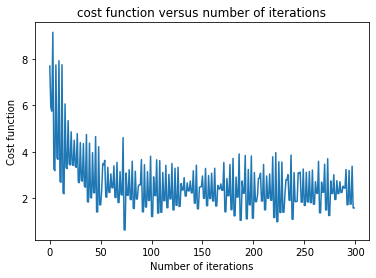

Bias with polynomial kernel of order 8 =  [0.0681255]
Coefficients with polynomial of oder 8 =  [[0.0681255]
 [0.0681255]
 [0.0681255]
 [0.0681255]
 [0.0681255]
 [0.0681255]
 [0.0681255]
 [0.0681255]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


minimum error is minimum for polynomial kernel is 50
Bias with sigmoid kernel of order 8 =  [0.26805128]
Coefficients with sigmoid of oder 8 =  [[2.68039108e-01]
 [1.34025639e-01]
 [1.21689567e-05]
 [5.52494860e-10]
 [2.50832279e-14]
 [1.13877678e-18]
 [5.17003860e-23]
 [2.34719389e-27]
 [1.06562438e-31]
 [4.83792719e-36]
 [2.19641555e-40]]
minimum error for sigmoid kernel is 257
 minimum error for gaussian kernel is 257
Bias with polynomial kernel of order 8 =  [0.07737219]
Coefficients with polynomial of oder 8 =  [[0.07737219]
 [0.07737219]
 [0.07737219]
 [0.07737219]
 [0.07737219]
 [0.07737219]
 [0.07737219]]
coefficients for polynomial kernel we get for model orders from 0 to 9 is [0.31597173 0.31597173 0.20634595 0.20634595 0.20634595 0.15492607
 0.15492607 0.15492607 0.15492607 0.12502372 0.12502372 0.12502372
 0.12502372 0.12502372 0.10463021 0.10463021 0.10463021 0.10463021
 0.10463021 0.10463021 0.0881002  0.0881002  0.0881002  0.0881002
 0.0881002  0.0881002  0.0881002  0.07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in multiply


Text(0.5, 1.0, 'error versus batch size')

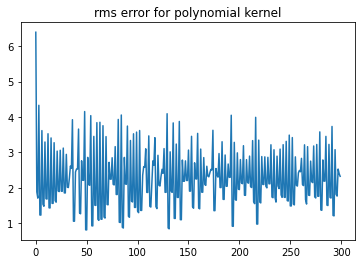

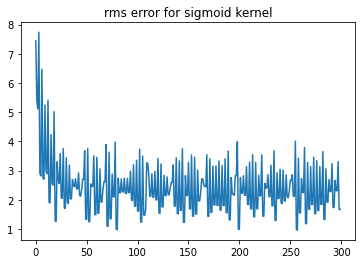

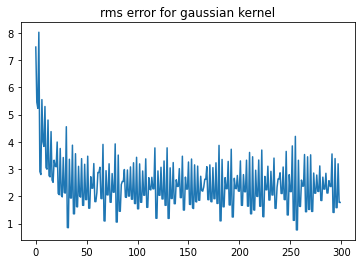

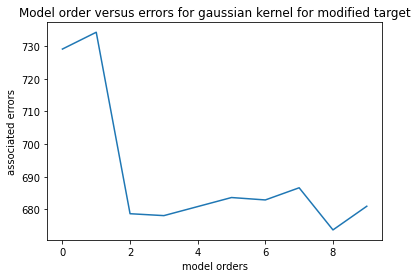

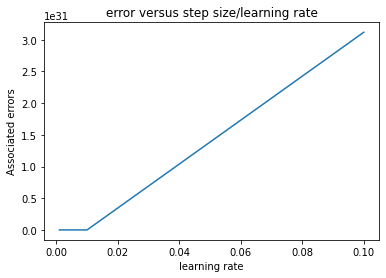

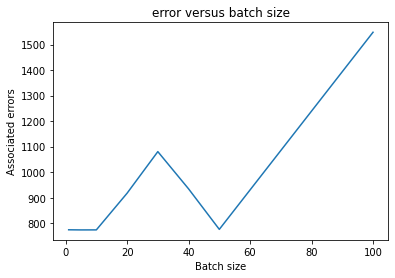

In [13]:
#Question 4
#Question 4


def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)
# linear regression using "stochastic" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing various-batches 
def create_diff_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform batch gradient descent #By default,batch size is 32
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 100
    for itr in range(max_iters): 
        mini_batches = create_diff_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
    return theta, error_list
#Now repeating ques 3 with this gradient descent algorithm
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing

data=np.reshape(data,(100,1))
x=np.reshape(x,(100,1))
# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
x = np.hstack((np.ones((x.shape[0], 1)), x)) 
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = x[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = x[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))

#Performing gradient descent without any kernel 
theta, error_list = gradientDescent(X_train,y_train) 
print("Bias without any kernel = ", theta[0]) 
print("Coefficients without any kernel = ", theta[1:]) 
# predicting output for X_test 
y_pred = hypothesis(X_test,theta)
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error  = ", error) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost function") 
plt.title("cost function versus number of iterations")
plt.show()

#Polynomial kernel
M=8 #let Model order is 8
powers=[i for i in range(M)]
P= polynomial_design_matrix(X_train, powers, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with polynomial kernel of order 8 = ", theta[0]) 
print("Coefficients with polynomial of oder 8 = ", theta[1:]) 

#3(a) repeating 3 (a) using gradient descent
# WITH POLYNOMIAL KERNEL
xpoints1 = np.linspace(0, 1,50) #with poynomial kernel
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(X_train, powers, bias=True)
  W,z = gradientDescent(X,y_train) # normal equation
  predicted=X.dot(W)
plt.figure()
plt.plot(z)
plt.title("rms error for polynomial kernel")
m=np.argmin(z)
print("minimum error is minimum for polynomial kernel is",m)
#With sigmoid kernel
#Sigmoid kernel
M=11 #let Model order is 11
X_train=X_train.ravel()
mus=np.arange(11)
P=sigmoid_design_matrix(X_train, mus, s=0.1, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with sigmoid kernel of order 8 = ", theta[0]) 
print("Coefficients with sigmoid of oder 8 = ", theta[1:]) 
#Model order ranges from 0 to 9
for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z = gradientDescent(X,y_train) 
  predicted=X.dot(W)
plt.figure()
plt.plot(z)
plt.title("rms error for sigmoid kernel")
m=np.argmin(z)
print("minimum error for sigmoid kernel is",m)
#WITH GAUSSIAN KERNEL
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z= gradientDescent(X,y_train) 
  predicted=X.dot(W)
plt.figure()
plt.plot(z)
plt.title("rms error for gaussian kernel")
m=np.argmin(z)
print( " minimum error for gaussian kernel is",m)
  

#Repeting 3(b) using gradient descent for modified target
  
#Creating 100 data points ,50 for training and 50 for testing for modified target
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing

data=np.reshape(data,(100,1))
x=np.reshape(x,(100,1))
# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
x = np.hstack((np.ones((x.shape[0], 1)), x)) 
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = x[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = x[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))
#Performing gradient descent without any kernel 

#Polynomial kernel
M=8 #let Model order is 8
powers=[i for i in range(M)]
P= polynomial_design_matrix(X_train, powers, bias=False)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with polynomial kernel of order 8 = ", theta[0]) 
print("Coefficients with polynomial of oder 8 = ", theta[1:]) 

#3(a) repeating 3 (a) using gradient descent
# WITH POLYNOMIAL KERNEL
#with poynomial kernel
powers=[]
w=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(X_train, powers, bias=True)
  W,z = gradientDescent(X,y_train) # normal equation
  w=np.append(w,W)
  
print("coefficients for polynomial kernel we get for model orders from 0 to 9 is",w)

#With sigmoid kernel
#Sigmoid kernel
M=11 #let Model order is 11
X_train=X_train.ravel()
mus=np.arange(11)
P=sigmoid_design_matrix(X_train, mus, s=0.1, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with sigmoid kernel of order 8 = ", theta[0]) 
print("Coefficients with sigmoid of oder 8 = ", theta[1:]) 
w=[]
for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z = gradientDescent(X,y_train) 
  predicted=X.dot(W)
  w=np.append(w,W)
print("coefficients for sigmoid kernel we get for model orders from 0 to 9 is",w)

#WITH GAUSSIAN KERNEL
w=[]
z=[]
M=[i for i in range(10)]
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(X_train, mus, s=0.3, bias=True)
  W,Z= gradientDescent(X,y_train) 
  predicted=X.dot(W)
  w=np.append(w,W)
  z=np.append(z,np.sum(Z))
print("coefficients for gaussian kernel we get for model orders from 0 to 9 is",w)
plt.figure()
plt.plot(z)
plt.xlabel("model orders")
plt.ylabel("associated errors")
plt.title("Model order versus errors for gaussian kernel for modified target")
#Effect of step size on convergence of weight vectors
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing
y_true=sinusoidal(x_train)
data=np.reshape(data,(100,1))

# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))
learning_rate=[0.001,0.01,0.1,1,10,100,1000] #Different learning rates
weight_vectors=[]
error=[]
i=0
for i in range(len(learning_rate)):
  w,errorr=gradientDescent(X_train,y_train, learning_rate[i], batch_size = 32)
  error=np.append(error,np.sum(errorr))
  w=np.append(weight_vectors,w)
  i=i+1
plt.figure()
plt.plot(learning_rate,error)
plt.xlabel("learning rate")
plt.ylabel("Associated errors")
plt.title("error versus step size/learning rate")

#Effect of different batch sizes
batch_sizes=[1,5,10,20,30,40,50,100] #Different  batch sizes
weight_vectors=[]
error=[]
i=0
for i in range(len(batch_sizes)):
  w,errorr=gradientDescent(X_train,y_train, learning_rate=0.01,batch_size=batch_sizes[i])
  error=np.append(error,np.sum(errorr))
  w=np.append(weight_vectors,w)
  i=i+1
plt.figure()
plt.plot(batch_sizes,error)
plt.xlabel("Batch size")
plt.ylabel("Associated errors")
plt.title("error versus batch size")

#Conclusion:
#Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties.
#A compromise between computing the true gradient and the gradient at a single example is to compute the gradient against more than one training example (called a "mini-batch") at each step. 
#This can perform significantly better than "true" stochastic gradient descent described, because the code can make use of vectorization libraries rather than computing each step separately.
#It may also result in smoother convergence, as the gradient computed at each step is averaged over more training examples.

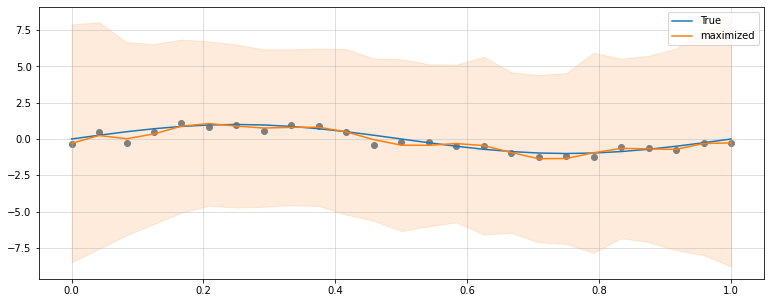

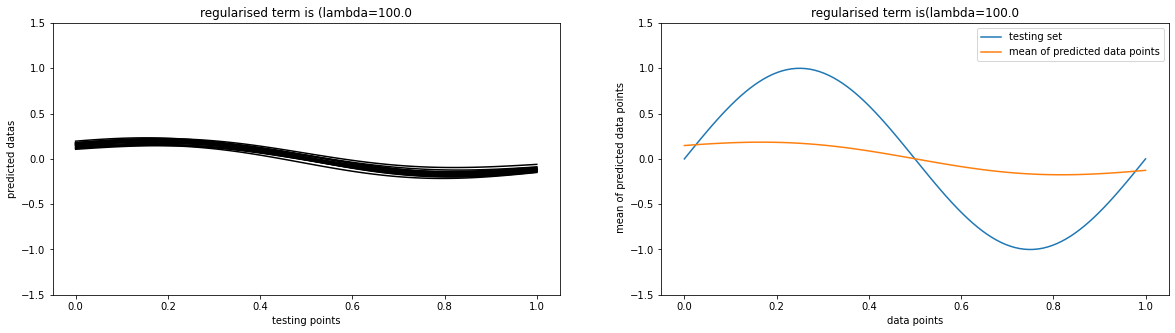

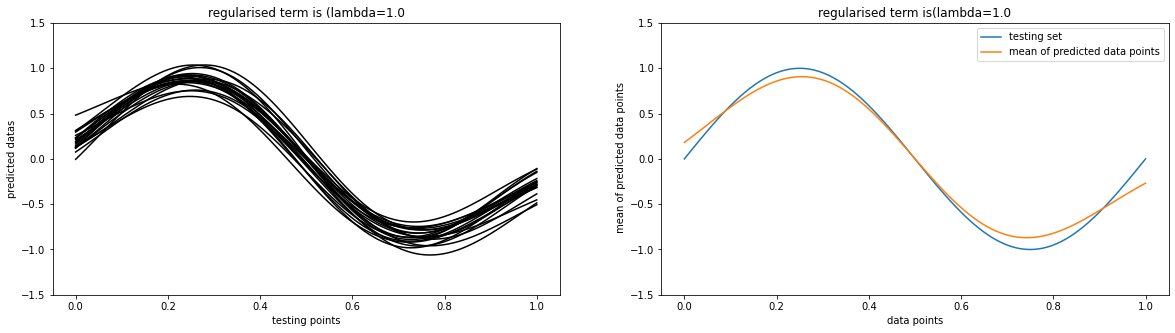

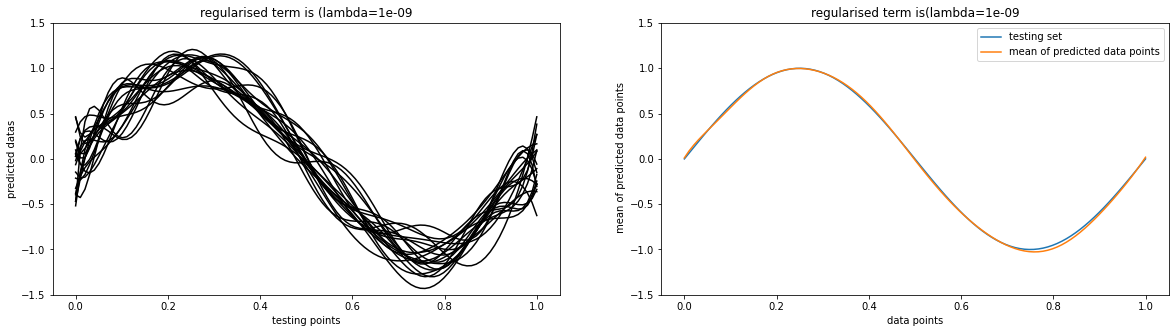

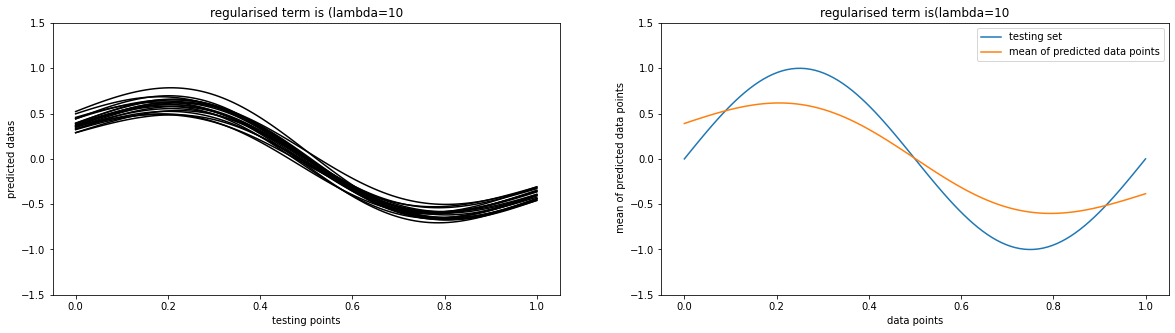

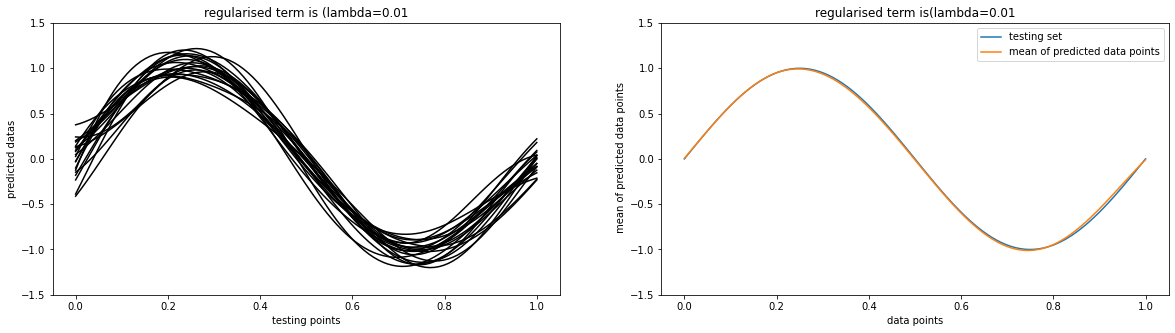

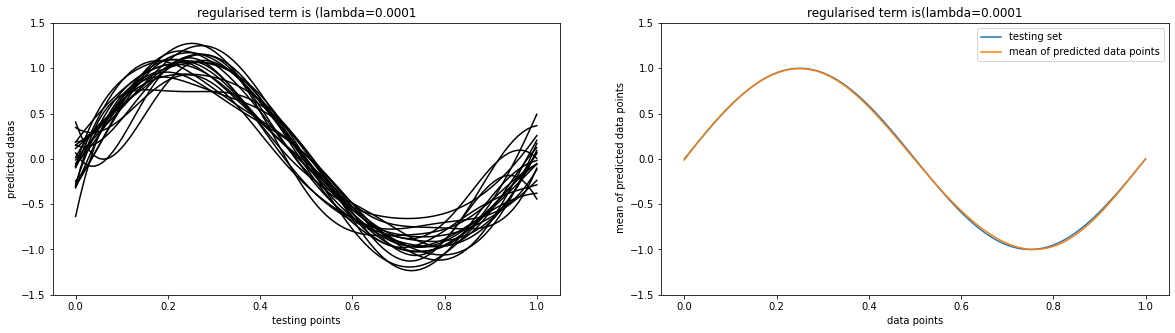

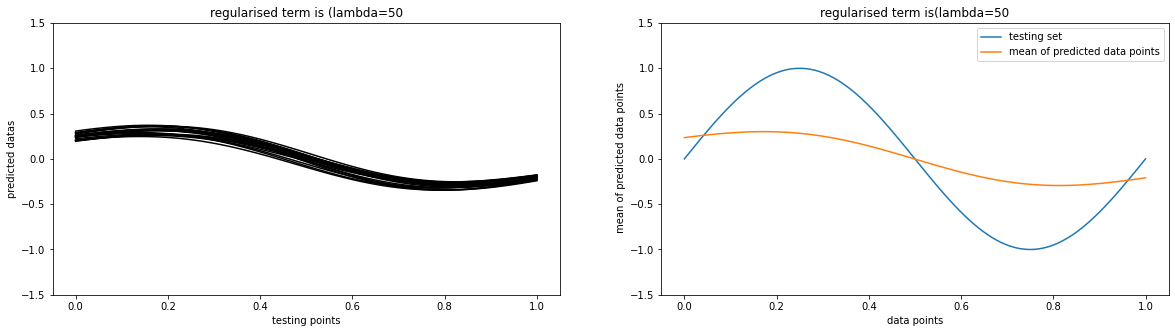

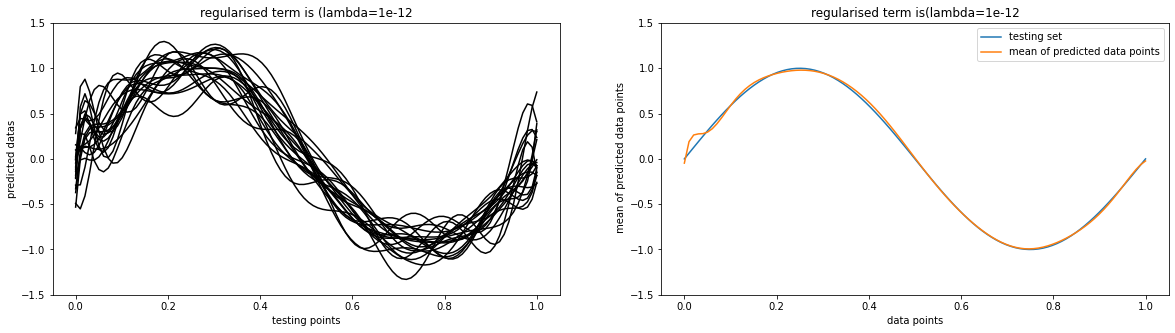

In [14]:
##question 5 -Bias variance trade-off
## 100 datasets with each set consists of 25 points data sets

x_train,y_train=load_data(sinusoidal,25, np.sqrt(0.1),domain=[0, 1])  #Noisy sinusoidal 100 data sets each of 25 data points
N=25



##Using gaussian basis function,fitting the model
def sigmoid(z): 
  return 1 / (1 + np.exp(-z))

def gaussian_kernel(x, mu, s): return np.exp(-(x - mu)**2 / (2 * s ** 2))

def gaussian_design_matrix(x, mus, s, bias=True):
    
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi



def posterior(Phi, t, alpha, beta):
    
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv

variance=20
precision=1/variance
alpha, beta = 0.01,-0.5
s = 0.2
models = [1, 2, 3, 4, 5, 6, 7, 8,9]


alpha, beta = 0.01, -.5
alpha, beta = 0.01, -.5 #standard prior
M = 25 # gaussian basis functions + bias term
mus = np.linspace(0, 1, M)
Phi = gaussian_design_matrix(x_train, mus, s)
N = Phi.shape[0]

mN, SN_inv = posterior(Phi,y_train, alpha, beta)
##Model selection
x_in = np.linspace(0, 1, 25)
plt.figure(figsize=(13, 5))
phi_x = gaussian_design_matrix(x_in, mus, s, bias=True)
stdev = 1 / beta + np.diag(phi_x @ inv(SN_inv) @ phi_x.T)
mu = (phi_x @ mN).ravel()

plt.plot(x_in, np.sin(2 * np.pi * x_in), label="True")
plt.plot(x_in, mu, label="maximized", c="tab:orange")
plt.fill_between(x_in, mu - 2 * stdev, mu + 2 * stdev, alpha=0.15, color="tab:orange")
plt.scatter(x_train, y_train, c="tab:gray")
plt.grid(alpha=0.5)
plt.legend();

x_test=np.linspace(0,1,100) #100 data points are generated
y_test=sinusoidal(x_test)
for a in [1e2, 1., 1e-9,10,0.01,0.0001,50,1e-12]: #Different lambdas
    y_list = []
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    for i in range(100):
        x_train, y_train = load_data(sinusoidal, 25, 0.25)
        mus=np.linspace(-1,1,25) #M=25
        X_train = gaussian_design_matrix(x_train, mus, s, bias=True)
        X_test = gaussian_design_matrix(x_test, mus, s, bias=True)
        Y = np.c_[y_train] # defining labels
        w1=regularised(X_train,Y,lam=a) #Regularised least squares
        y = X_test.dot(w1) #Prediction
        y_list.append(y)
        if i < 20: #20 is considered for better clearance of datas
            plt.plot(x_test, y, c="black")
    plt.title(f'regularised term is (lambda={a}')
    plt.ylim(-1.5, 1.5)
    plt.xlabel("testing points")
    plt.ylabel("predicted datas")
    #plt.title("testing versus predicted over 20 iterations")
    plt.subplot(1, 2, 2)
    plt.plot(x_test, y_test,label="testing set")
    plt.plot(x_test, np.asarray(y_list).mean(axis=0),label="mean of predicted data points")
    plt.xlabel("data points")
    plt.title(f'regularised term is(lambda={a}')
    plt.ylabel(" mean of predicted data points")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()
#conclusion
    #We see that small
#values of λ allow the model to become finely tuned to the noise on each individual
#Conversely, a large value of λ pulls the weight
#parameters towards zero leading to large bias.
#Although the bias-variance decomposition may provide some interesting in-
#sights into the model complexity issue from a frequentist perspective, it is of lim-
#ited practical value, because the bias-variance decomposition is based on averages
#with respect to ensembles of data sets,




#REGULARISATION REDUCES THE PROBLEM OF OVERFITTING WHICH IS CLEARLY SEEN FROM ABOVE GRAPHS

Understanding MAP estimate
(a) Generate 100 noisy data points of a sinusoid. Fit a 20th order linear regression model with Gaussian basis functions. Starting from a standard normal prior, update the statistivs of the posterior density of the parameters using Bayesian sequential updates.

(b) Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid.

(c) Use the posterior distribution of the parameters to evaluate the predictive distribution of target p(t0/x0, X, t), and plot it for different number of training datapoints, as discussed in the class.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/loca

updated model parameters mean: [[ -1528.71233456+0.j]
 [ 23880.72682356+0.j]
 [-36171.02754268+0.j]
 [ -8840.91736174+0.j]
 [ 23310.69093125+0.j]
 [ 20506.56309284+0.j]
 [ -5917.08263187+0.j]
 [-22750.23787086+0.j]
 [-12808.66115761+0.j]
 [ 10685.85823724+0.j]
 [ 21520.98700576+0.j]
 [  8791.48325505+0.j]
 [-12871.23212859+0.j]
 [-19975.52916455+0.j]
 [ -5231.14542191+0.j]
 [ 15123.73472003+0.j]
 [ 18987.94855533+0.j]
 [  2123.13271677+0.j]
 [-17056.98129571+0.j]
 [-17090.05345005+0.j]
 [  2837.88575626+0.j]
 [ 20357.06815572+0.j]
 [ 13313.58398255+0.j]
 [-13008.60852637+0.j]
 [-23203.7952388 +0.j]
 [ 18657.13340603+0.j]]
updated model parameters alpha: [(1.382716495747758e-11+0j), (1.664669230065516e-09+0j), (1.485395897044559e-09+0j), (1.4924324141465544e-09+0j), (1.4920848158411417e-09+0j), (1.4920877732609591e-09+0j)]
updated model parameters beta: [(12.804399462423204+0j), (7.768926096996129+0j), (8.772086299146979+0j), (8.716363553181418+0j), (8.719137344400565+0j), (8.7190020084

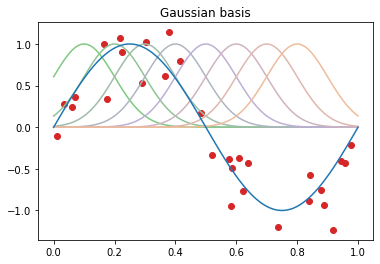

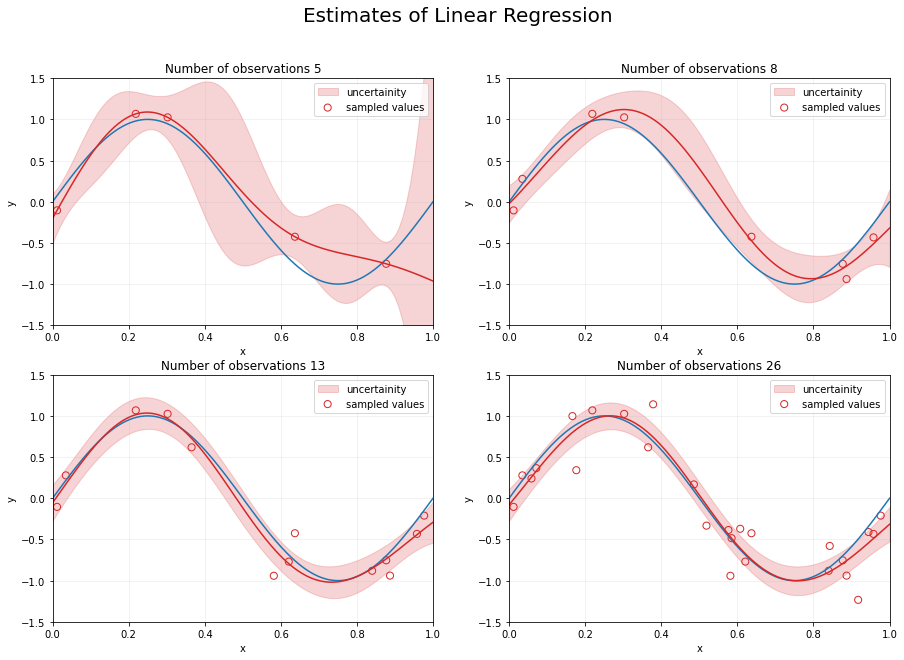

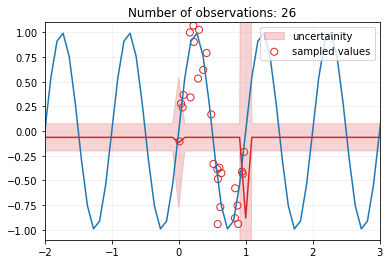

In [15]:
## Question 6
#Predictive distribution for Bayesian Linear Regression¶
#The predictive distribution for a linear model using MAP

def f(x): 
  return np.sin(2 * np.pi * x)
def gaussian_kernel(x, mu, s): 
  return np.exp(-(x - mu) ** 2 / (2 * s ** 2))

x_true = np.linspace(0, 1, 100) #100 data points
y_true = f(x_true)

x_train,y_train=load_data(sinusoidal,25, np.sqrt(0.1),domain=[0, 1])  #Noisy sinusoidal 100 data sets 
N=25
variance=20
precision=1/variance
alpha, beta = 0.01,-0.5
s = 0.2
models = [1, 2, 3, 4, 5, 6, 7, 8,9]
def gaussian_design_matrix(x, mus, s, bias=True):
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def posterior(Phi, t, alpha, beta):
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv


alpha, beta = 0.01, -.5 #standard prior
M = 25 # gaussian basis functions + bias term
mus = np.linspace(0, 1, M)
Phi = gaussian_design_matrix(x_train, mus, s)
N = Phi.shape[0]

delta_alpha, delta_beta = float('inf'), float('inf')
tol = 2e-5
alpha_hist, beta_hist = [], []
phi_eigs = eigvals(Phi.T @ Phi)
mN, SN_inv = posterior(Phi,y_train, alpha, beta)
#6(a)
#Sequential updates
while delta_alpha > tol and delta_beta > tol:
    # Update eigenvalues of the matrix
    lambdas = phi_eigs * beta
    gamma = (lambdas / (lambdas + alpha)).sum()
    # Update model parameters
    mN, SN_inv = posterior(Phi, y_train, alpha, beta)
    # Compute new hyperparams
    new_alpha = gamma / np.asscalar(mN.T @ mN)
    new_beta = (Phi.shape[0] - gamma) / ((y_train[:, np.newaxis] - Phi @ mN) ** 2).sum() 
    # Compute the percentual change in hyperparams
    delta_alpha = np.abs(new_alpha / alpha - 1)
    delta_beta = np.abs(new_beta / beta - 1)
    # Update alpha, beta
    alpha, beta = new_alpha, new_beta
    alpha_hist.append(alpha)
    beta_hist.append(beta)
print("updated model parameters mean:",mN)
print("updated model parameters alpha:",alpha_hist)
print("updated model parameters beta:",beta_hist)
print("updated model parameters SN inverse:",SN_inv)


#Linear basis function of choice
colors = branca.colormap.linear.Accent_03
s = 0.1
mu = np.arange(0.1, 0.9, 0.1)
for j, mu_j in enumerate(mu):
    plt.plot(x_true, gaussian_kernel(x_true, mu_j, s), c=colors(j / len(mu)))
plt.title("Gaussian basis")
#6(b)
#A sample of values to learn from

def sample_sinusoidal(S, beta, x_samp=None):
    x_samp = np.random.uniform(0, 1, S)  if x_samp is None else x_samp
    y_samp = np.random.normal(f(x_samp), 1 / np.sqrt(beta), S)
    return x_samp, y_samp


precision = 15
x_s, y_s = sample_sinusoidal(30, precision)

plt.plot(x_true, y_true)
plt.scatter(x_s, y_s, c="tab:red")

def fill_basis(x, s, mu):
    Phi = np.column_stack((gaussian_kernel(x, mu_j, s) for mu_j in mu))
    # bias term
    Phi = np.column_stack((np.ones_like(x), Phi))
    return Phi

def posterior_weights(alpha, s, beta, mus, x_train, y_train):
    Phi = fill_basis(x_train, s, mus)
    SN = inv(alpha + beta * Phi.T @ Phi)
    mN = beta * SN @ Phi.T @ y_train.reshape(-1, 1)
    return mN, SN
#Estimating the Confidence Intervals for the Regression
def posterior(Phi, t, alpha, beta):
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv


def plot_estimate(xt, yt, xrange, yrange, mu, sigma, ax=plt):
    ax.plot(xrange, yrange)
    ax.plot(xrange, mu, c="tab:red")
    ax.fill_between(xrange, mu.ravel() - 2 * sigma,
                     mu.ravel() + 2 * sigma,
                     color="tab:red", alpha=0.2,label="uncertainity")
    ax.scatter(xt, yt, facecolors="none", edgecolors="tab:red", s=50,label="sampled values")
    ax.legend()
    ax.grid(alpha=0.2);

step = 0.25
mu = np.arange(0, 1 + step, step) # mus to consider for the Gaussian basis functions
s = 0.3
alpha = 0.1

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
vals = [5, 8, 13, 26]
for axi, v in zip(ax.ravel(), vals):
    xtarget = x_s[:v]
    ytarget = y_s[:v]

    mN, SN = posterior_weights(alpha, s, precision, mu, xtarget,  ytarget)
    Phi = fill_basis(x_true, s, mu).T
    mu_pred = Phi.T @ mN
    sigma_pred = 1 / precision + np.diag(Phi.T @ SN @ Phi)
    
    axi.set_xlim(0, 1)
    axi.set_xlabel("x")
    axi.set_ylabel("y")
    axi.set_ylim(-1.5, 1.5); 
    axi.set_title(f"Number of observations {v}")
    plot_estimate(xtarget, ytarget, x_true, y_true, mu_pred, sigma_pred, ax=axi)
plt.suptitle("Estimates of Linear Regression", size=20);

#If we use localized basis functions such as Gaussian, then in regions away from the basis function centers, the contribution from the second term in the predictive variance will go to zero

#6(c)
x_true = np.linspace(-4, 5, 100)
y_true = f(x_true)

step = 1
mu = np.arange(0, 1 + step, step) # mus to consider for the Gaussian basis functions
s = 0.01
alpha = 0.1

fig, axi = plt.subplots(1,1)
xtarget = x_s
ytarget = y_s

mN, SN = posterior_weights(alpha, s, precision, mu, xtarget,  ytarget)
Phi = fill_basis(x_true, s, mu).T
mu_pred = Phi.T @ mN
sigma_pred = 1 / precision + np.diag(Phi.T @ SN @ Phi)
print("Predicted mean is:",mu_pred)
print("predicted standard deviation is",sigma_pred)
axi.set_xlim(-2, 3)
axi.set_ylim(-1.1, 1.1); 
axi.set_title(f"Number of observations: {v}")
plot_estimate(xtarget, ytarget, x_true, y_true, mu_pred, sigma_pred, ax=axi)






   
###### we know that mean of predictive distribution will be the target for the corresponding input data
###### so  plotted mean of predictive distribution for the target against input data points from sinusoidal
############# as data points increses the overfitting is reducing and finally it fits perfectly to the tset data the reason is distribution of weights 
############ instead of a point estimation.
##Again, as the size of the dataset increases the posterior sample variance and the prediction uncertainty decreases. Also, regions with less observations have higher prediction uncertainty.

